# External modules

In [1]:
options(tidyverse.quiet = TRUE)
options(caret.quiet = TRUE)
options(Hmisc.quiet = TRUE)
options(vroom.quiet = TRUE)

In [2]:
library(tidyverse)
library(readr)
library(DescTools)
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:DescTools’:

    %nin%, Label, Mean, Quantile


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




# Internal functions

In [133]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/read_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/load_functions.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/make_models.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/transform_data.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/calculate_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/save_multiple_model_aic.R"))
xfun::in_dir(dir = path, expr = source("./eva_pipeline/src/extract_multiple_model_aic.R"))


In [5]:
options(repr.plot.width=19, repr.plot.height=12)

# Data

In [6]:
data_path <- "./04_experimentation_01/merged_data.csv"

data <- xfun::in_dir(dir = path, expr = read_data(data_path))

In [7]:
str(data)

'data.frame':	22846 obs. of  52 variables:
 $ timestamp            : int  17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 17608320 ...
 $ latitude             : num  48.8 48.8 48.8 48.8 48.8 ...
 $ longitude            : num  2.46 2.46 2.46 2.46 2.46 ...
 $ lateral_error        : num  -0.571 -0.566 -0.56 -0.592 -0.57 ...
 $ longitudinal_error   : num  0.0775 0.0832 0.0979 0.1043 0.1078 ...
 $ latitude_error       : num  4.77e-06 4.73e-06 5.57e-06 4.96e-06 5.20e-06 ...
 $ longitude_error      : num  1.33e-07 2.49e-07 3.92e-07 5.62e-07 6.13e-07 ...
 $ velocity_latitude    : num  -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 -4.04e-11 ...
 $ velocity_longitude   : num  9.48e-12 7.09e-12 6.72e-12 8.41e-12 6.65e-12 ...
 $ velocity             : num  5.00e-11 3.89e-11 3.79e-11 4.93e-11 4.09e-11 ...
 $ name_airplane        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ name_bench..group.   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n

## Outliers analysis

In [11]:
# transform data
response_var <- "lateral_error"

coefficient_iqr <- 3

data_object <- transform_data(data = data, 
                              response_var = response_var,
                              response_abs = TRUE,
                              scale_predictors = TRUE,
                              coefficient_iqr = coefficient_iqr, 
                              iterate = 20,
                              remove_outliers = FALSE,
                              method = c("interpolate", "mode", "median", "mean")[1])

In [12]:
iterate <- data_object$iterate

iterate

[1] 4

In [13]:
outlier_positions <- data_object$outlier_positions

outlier_positions

[1]  2342  2343  2344  2345  2346  2347  2348  2349  2350  2351  2352  2353
 [13]  2354  2355  2356  2357  2358  2359  2360  2361  2362  2363  2364  2365
 [25]  2366  2367  2368  2369  2370  2371  2372  2373  2374  2375  2376  2377
 [37]  2378  2379  2380  2381  2382  2383  2384  2385  2386  2387  2388  2389
 [49]  2390  2391  2392  2393  2394  2395  2396  2397  2398  2399  2400  2401
 [61]  2402  2403  2404  2405  2406  2407  2408  2409  2410  2411  2412  2413
 [73]  2414  2415  2416  2417  4810  4811  4812  4813  4814  4815  4816  4817
 [85]  4818  4819  4820  4821  4822  4823  4824  4825  4826  4827  4828  4829
 [97]  4830  4831  4832  4833 13506 16571 16572 16573 16574 16575 16576 16577
[109] 16578 16579 16598 16599 16600 16601 16602 16603 16604 16605 16606 16607
[121] 16608 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619
[133] 16620 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631
[145] 16632 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643
[157] 16644 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 17446
[169] 17447 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397
[181] 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409
[193] 18410 18411 18412 18413 18415 18416 18417 18418 18419 18420 18421 18422
[205] 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432 18433 18434
[217] 18435 18436 18437 18438 18439 18440 18441 18442 18443 18444 18445 18446
[229] 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458
[241] 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470
[253] 18471 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481 18482
[265] 18483 18484 18485 18486 18487 18488 18489 18490 18491 18492 18493 18494
[277] 18495 18496 18497 18498 18499 18500 18501 18502 18503 18504 18505 18506
[289] 18507 18508 18509 18510 18511 18512 18513 18514 18515 18516 18517 18518
[301] 18519 18520 18521 18522 18523 18524 18525 18526 18527 18528 18529 18530
[313] 18531 18532 18533 18534 18535 18536 18537 18538 18539 18540 18541 18542
[325] 18543 18544 18545 18546 18547 18548 18549 18550 18551 18552 18553 18554
[337] 18555 18556 18557 18558 18559 18560 18561 18562 18563 18564 18565 18566
[349] 18567 18568 18569 18570 18571 18572 18573 18574 18575 18576 18577 18578
[361] 18579 18580 18581 18582 18583 18584 18585 18586 18587 18588 18589 18590
[373] 18591 18592 18593 18594 18595 18596 18597 18598 18599 18600 18601 18602
[385] 18603 18604 18605 18606 18607 18608 18609 18610 18611 18612 18613 18614
[397] 18615 18616 18617 18618 18619 18624 16580 18620 18621 18622 18623 18625
[409] 18627 18628 18629 18630 18631 19840  2418

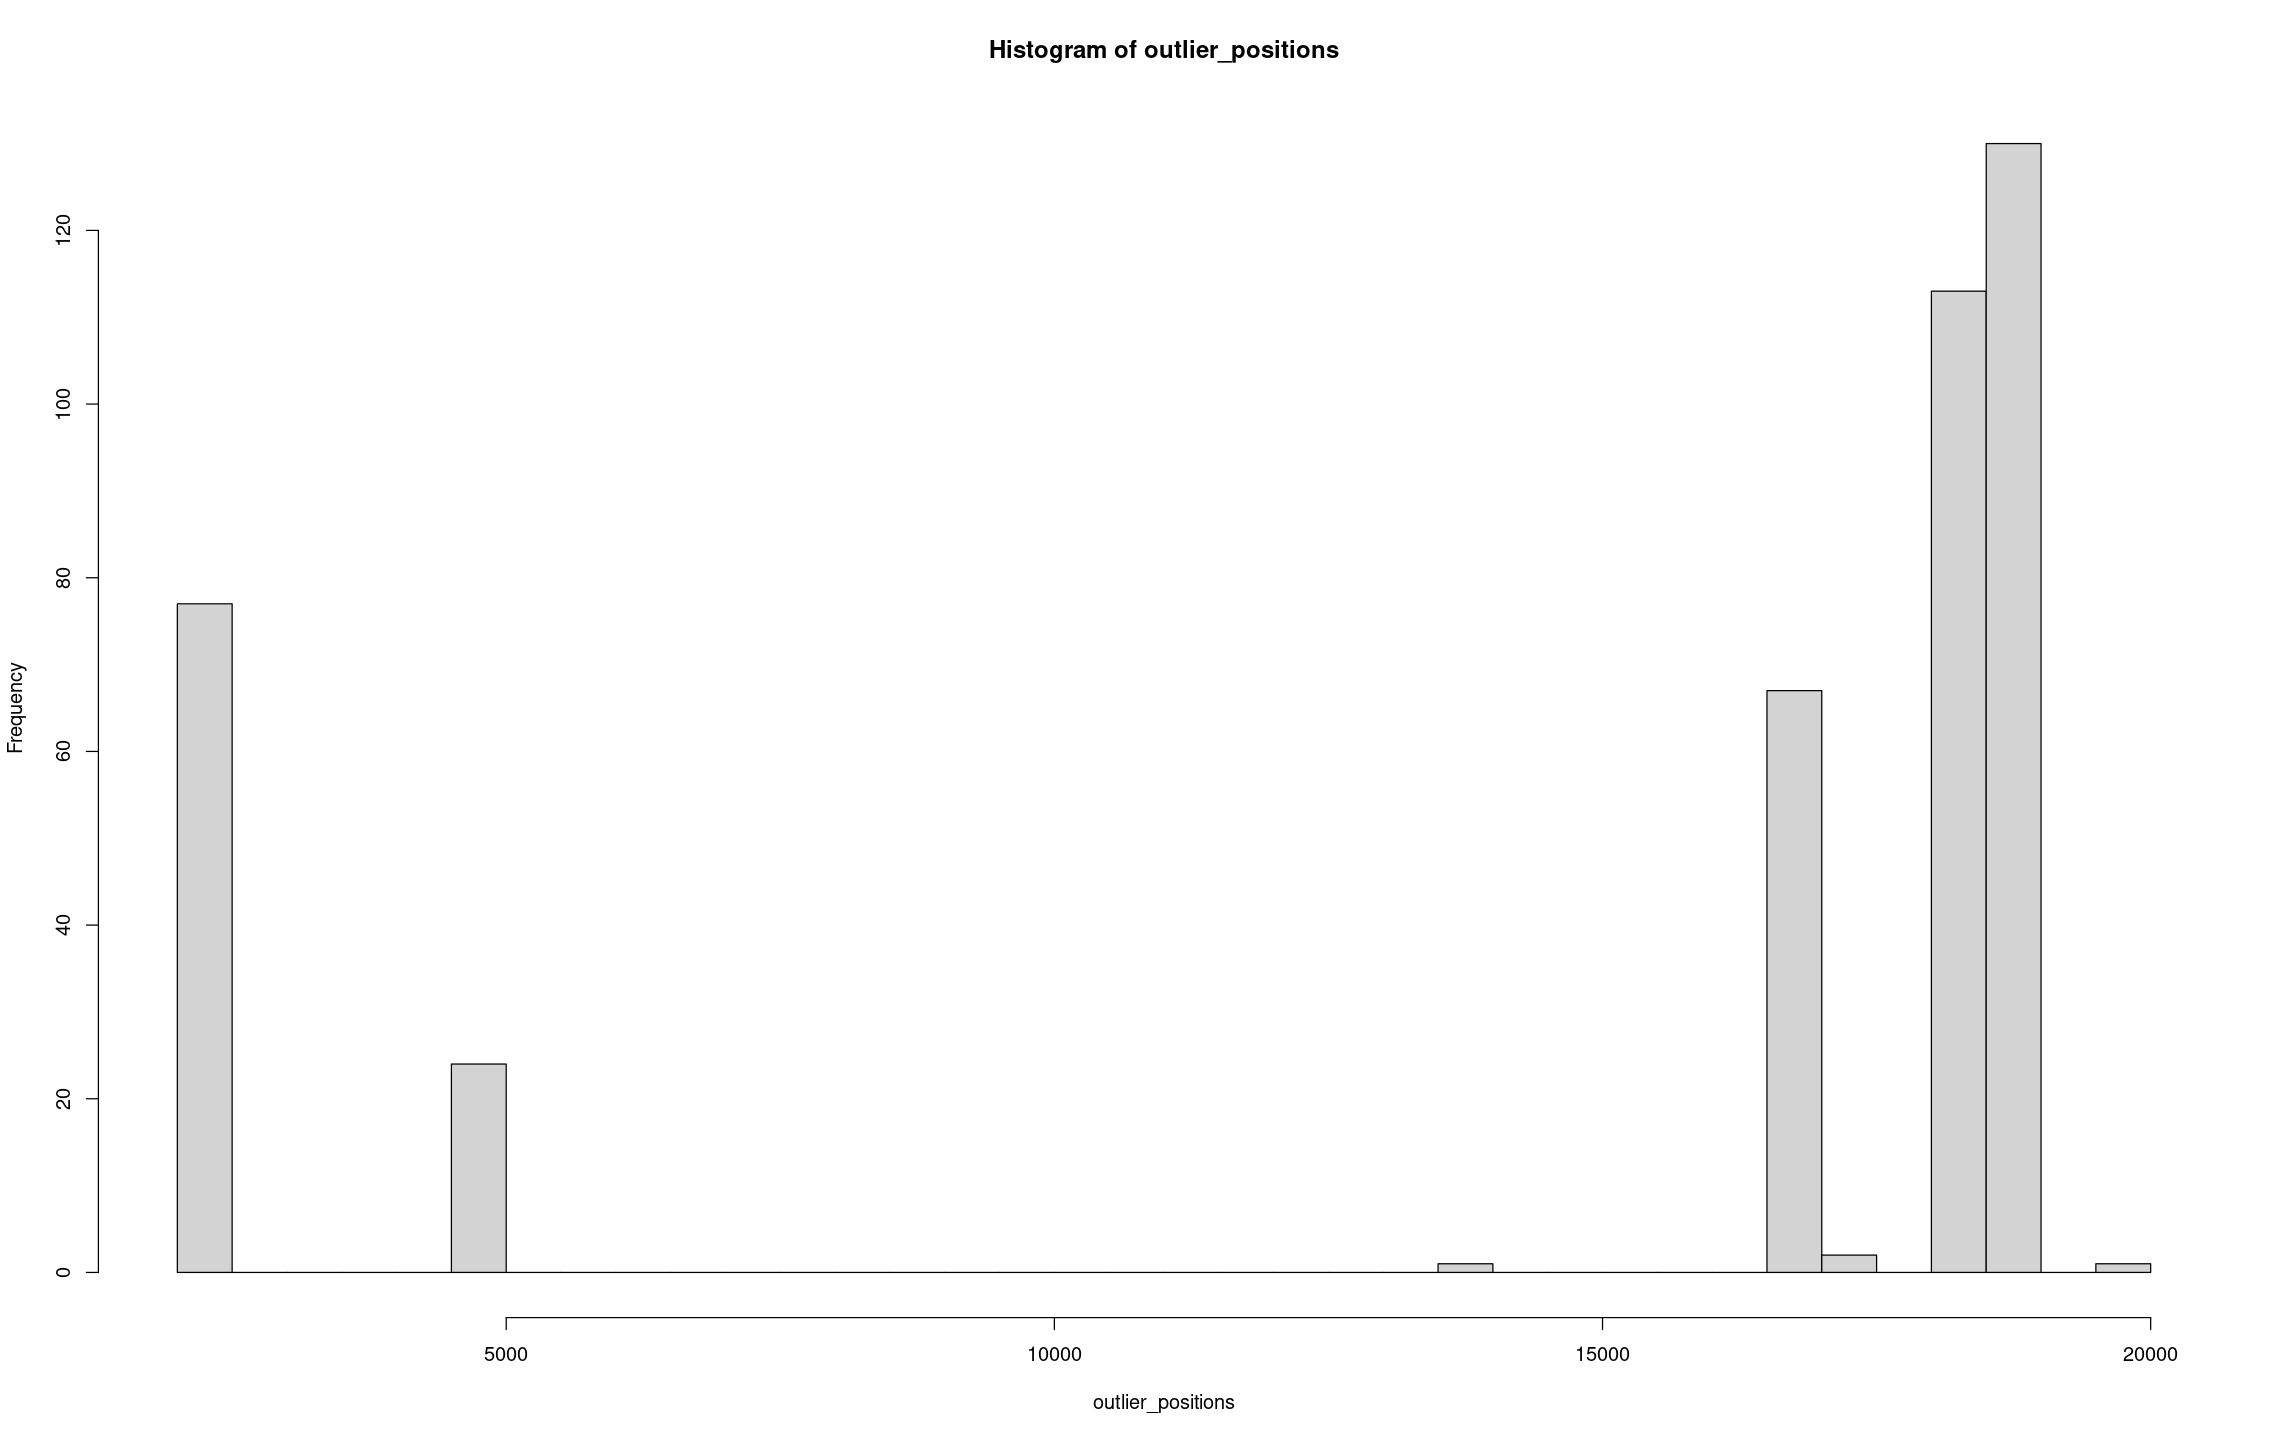

In [14]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

In [15]:
outlier_values <- data_object$outlier_values

outlier_values

[1]  2.184873104  2.732779503  3.006222725  3.895150661  4.261949539
  [6]  5.030237198  5.387993336  6.455604553  7.014128208  7.308514118
 [11]  7.610935688  7.798225880  7.907556057  8.119622231  8.187675476
 [16]  8.186152458  8.221673012  8.253808022  8.279128075  8.194468498
 [21]  8.205458641  8.178217888  8.108373642  8.057738304  8.026419640
 [26]  7.876454353  7.860546589  7.798650265  7.701650620  7.596509933
 [31]  7.634211063  7.527653217  7.466311932  7.330577850  7.255169392
 [36]  7.133202553  7.059005737  6.932627678  6.885303974  6.739459038
 [41]  6.542611599  6.318865776  6.100600719  5.890760899  5.718430042
 [46]  5.592728138  5.498566151  5.406100273  5.272714138  5.224787712
 [51]  5.182562351  5.120712280  5.015984535  5.037686348  4.976793766
 [56]  4.972993851  4.952771664  4.952544212  4.916001797  4.868603230
 [61]  4.758296490  4.744183064  4.627686501  4.505286217  4.361022472
 [66]  4.214217186  4.100304127  3.788075924  3.566706896  3.326011419
 [71]  3.083727121  2.921305418  2.771093369  2.604084969  2.428661108
 [76]  2.182354450  7.775327206  7.452221394  7.210327625  6.872229576
 [81]  6.687652588  6.562489986  6.237672329  6.103162289  6.022470474
 [86]  5.966412067  5.950079918  5.930442810  5.913148403  5.852420807
 [91]  5.738059044  5.540972710  5.297889233  5.168659210  5.013502598
 [96]  4.728649139  4.364569664  4.105094910  3.538748980  3.128833055
[101]  2.312228203  2.206686974  2.351611614  2.361630201  2.375175953
[106]  2.357097626  2.335332632  2.237861872  2.207300663  2.154528618
[111]  2.278670311  2.771753311  3.207637787  3.552799940  4.040451527
[116]  4.936261177  5.273302078  6.326401711  6.946446896  7.370677948
[121]  8.057784081  8.502832413  9.473826408 10.397840500 10.922791481
[126] 11.694986343 11.936242104 12.247079849 12.887074470 13.256324768
[131] 13.450218201 13.612427712 13.801614761 13.892393112 14.008658409
[136] 14.114330292 14.538104057 14.871605873 15.106700897 15.408733368
[141] 15.590641022 15.815428734 16.214225769 16.604370117 17.295207977
[146] 17.692142487 18.242160797 18.493989945 19.090238571 19.255954742
[151] 19.428293228 20.025951386 20.202747345 20.307353973 20.858482361
[156] 21.330503464 21.402330399 21.562334061 21.750417709 21.895032883
[161] 22.090166092 22.273391724 22.054981232 21.796689987 21.498889923
[166] 17.923336029  8.142934799  2.090826035  2.122449160  2.145105124
[171]  3.340724945  3.664999247  4.570543289  5.712432861  6.108156204
[176]  6.311995506  6.436964035  6.649435520  6.653500557  6.735800743
[181]  6.721082687  6.663797379  6.597108364  6.459681511  6.310772896
[186]  6.002843380  5.942730904  5.823526859  5.711785316  5.667007923
[191]  5.651128292  5.670092583  5.592570305  5.393000603  3.824931622
[196]  2.949864626  3.794187546  5.570847988  7.069868565  7.269009113
[201]  7.238419533  7.304058552  7.307997227  7.329240322  7.383411407
[206]  7.439856052  7.458771229  7.550690174  7.588142872  7.769646645
[211]  7.892141819  7.998895168  8.275163651  8.437351227  8.638635635
[216]  8.755347252  8.906926155  8.998470306  9.155323982  9.314714432
[221]  9.436856270  9.506617546  9.574791908  9.679572105  9.882457733
[226] 10.080101013 10.229024887 10.747855187 10.925580978 11.277595520
[231] 11.519678116 12.310634613 13.360582352 13.898347855 14.398936272
[236] 14.614928245 14.803196907 15.087105751 15.133486748 15.129502296
[241] 15.208720207 15.209801674 15.234956741 15.176564217 15.190121651
[246] 15.222224236 15.230353355 15.276042938 15.245158196 15.270928383
[251] 15.299601555 15.307911873 15.303745270 15.273931503 15.243393898
[256] 15.240942955 15.255673408 15.265043259 15.281039238 15.288377762
[261] 15.316594124 15.342389107 15.310406685 15.283331871 15.313362122
[266] 15.278633118 15.294309616 15.304340362 15.331607819 15.337777138
[271] 15.358584404 15.306885719 15.347656250 15.366465569 15.334030151
[276] 15.306579590 15.342056274 15.343005180 15.310344696 15.347384453
[281] 15.325051308 15.3224

In [16]:
options(repr.plot.width=19, repr.plot.height=12)

describe(outlier_values)

outlier_values 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
     415        0      415        1    9.562    6.367    2.121    2.185 
     .25      .50      .75      .90      .95 
   4.892    8.026   15.319   15.375   17.414 

lowest : 2.02129 2.02751 2.03073 2.03464 2.038  
highest: 21.7967 21.895  22.055  22.0902 22.2734

In [17]:
outlier_substitutes <- data_object$outlier_substitutes

data.frame("outlier_values" = outlier_values, "outlier_substitutes" = outlier_substitutes)

outlier_values,outlier_substitutes
<dbl>,<dbl>
2.184873104,1.897798599
2.732779503,1.898857716
3.006222725,1.899916832
3.895150661,1.900975949
4.261949539,1.902035065
5.030237198,1.903094182
5.387993336,1.904153298
6.455604553,1.905212415
7.014128208,1.906271531


## Response variable

In [18]:
x <- data_object$response

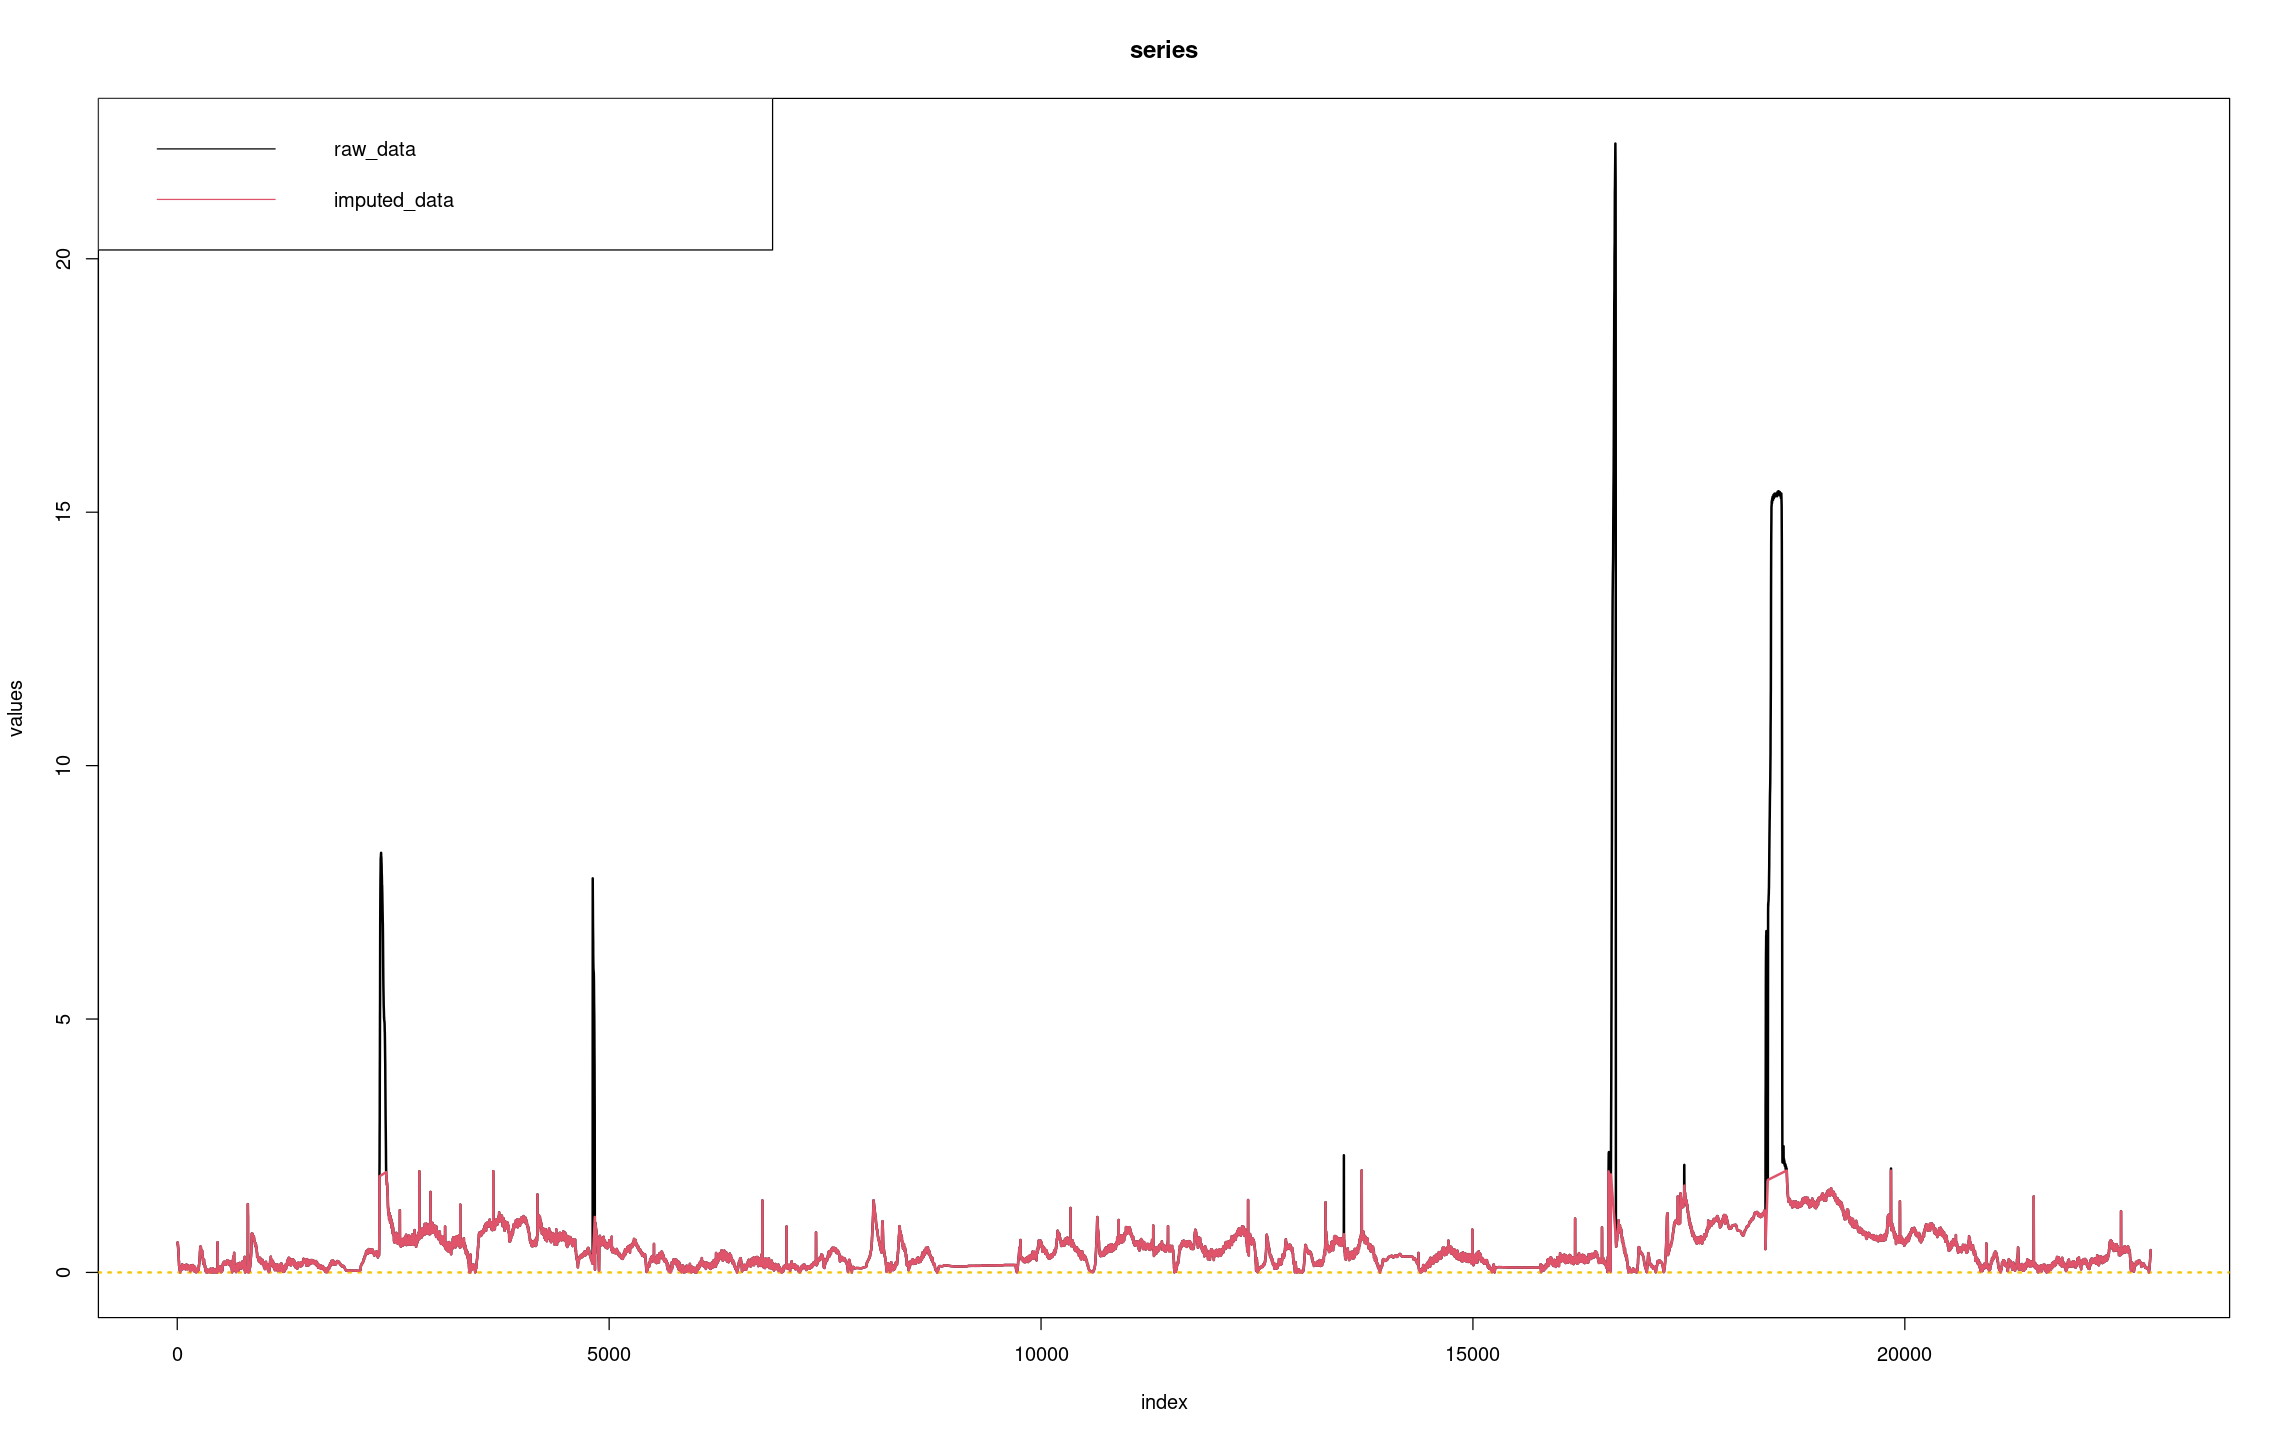

In [19]:
options(repr.plot.width=19, repr.plot.height=12)

plot(abs(data[, response_var]), 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")

abline(h = 0, lty = "dotted", col = 7, lwd = 2)

lines(x, col = 2, lwd = 2)

legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [20]:
describe(x)

x 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   22846        0    22580        1   0.4431   0.4009  0.04819  0.08723 
     .25      .50      .75      .90      .95 
 0.14571  0.32533  0.63046  0.94301  1.25439 

lowest : 8.5354e-05  8.76884e-05 0.000136104 0.000184512 0.00026877 
highest: 2.00544     2.0063      2.00727     2.00844     2.0132     

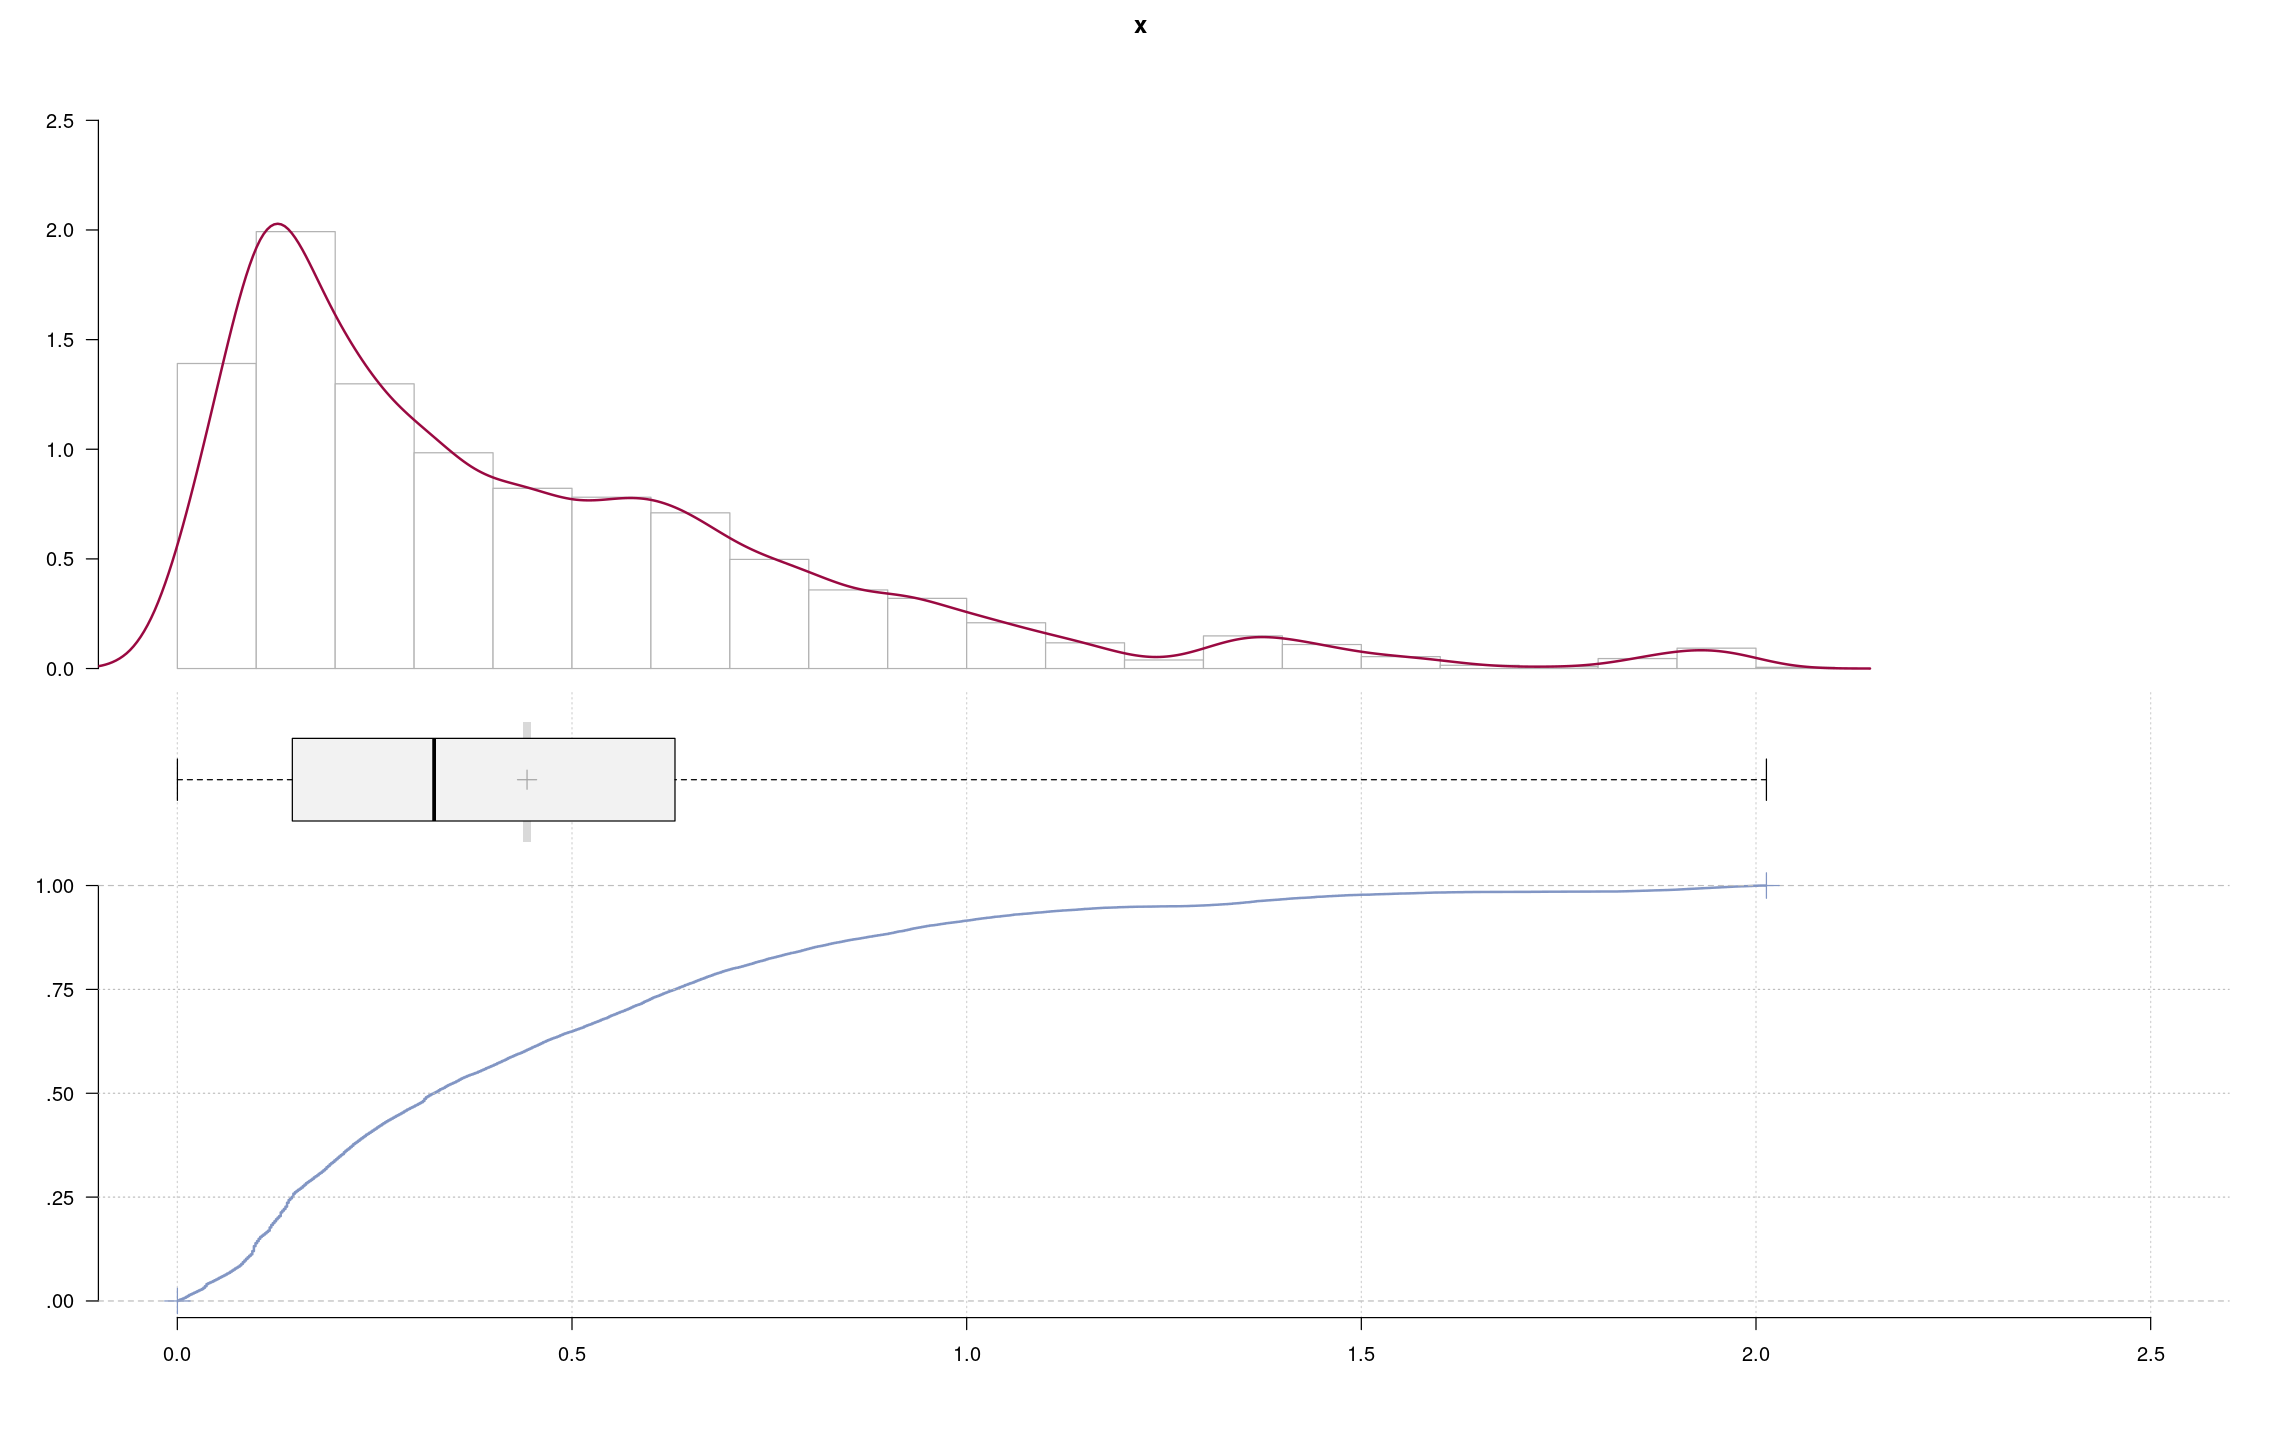

In [21]:
options(repr.plot.width=19, repr.plot.height=12)

PlotFdist(x = x, args.boxplot = list(range = coefficient_iqr))

In [22]:
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
describe(y)

y 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   20000        0    19789        1    0.498   0.3969   0.1155   0.1315 
     .25      .50      .75      .90      .95 
  0.2032   0.3947   0.6735   0.9882   1.3362 

lowest : 0.0968972 0.0969068 0.0969237 0.0969262 0.0969288
highest: 2.00544   2.0063    2.00727   2.00844   2.0132   

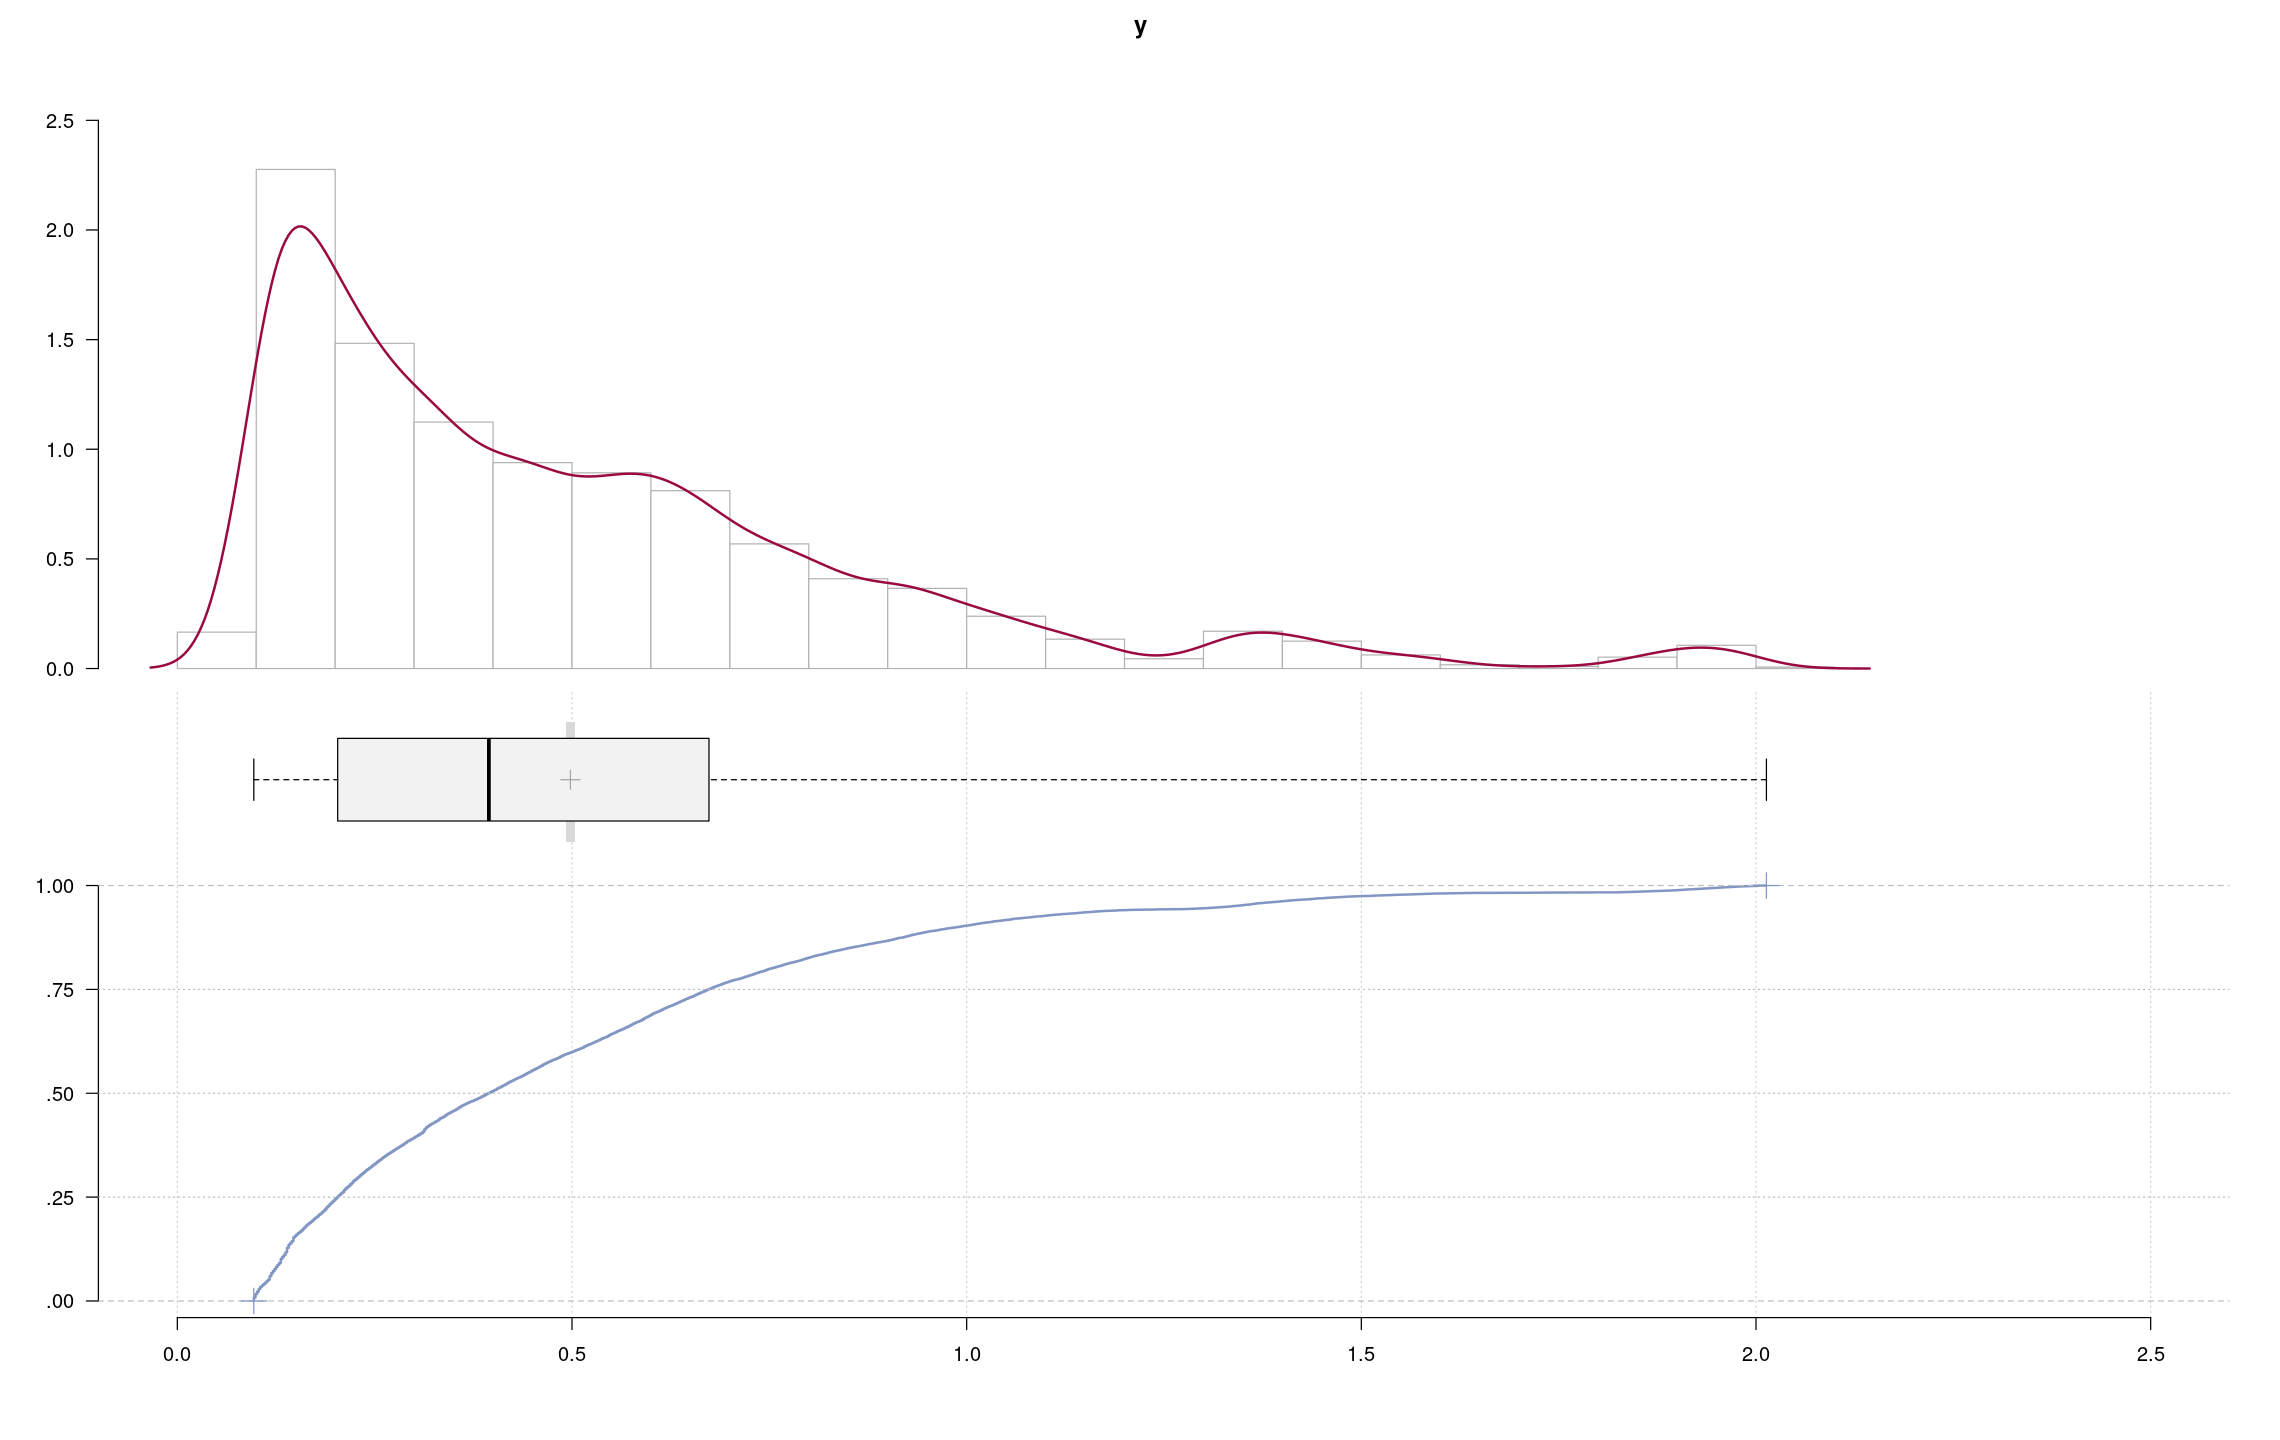

In [23]:
options(repr.plot.width=19, repr.plot.height=12)

PlotFdist(x = y, args.boxplot = list(range = coefficient_iqr))

## Predictor variables

In [24]:
detection_vars <- names(data)[c(11:45)]

data_covariates_detection <- data %>% select(all_of(detection_vars))

tail(data_covariates_detection)

,name_airplane,name_bench,name_bench..group.,name_bicycle,name_bird,name_bird..group.,name_boat,name_bus,name_car,name_car..group.,⋯,name_street.light,name_tenement,name_traffic.light,name_traffic.sign,name_train,name_tree,name_tree..group.,name_truck,name_tunnel,name_tunnel.entrance
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
22841,0,0,0,0,0,0,0,0,3,1,⋯,3,1,1,2,0,0,0,0,0,0
22842,0,0,0,0,0,0,0,1,5,1,⋯,2,2,0,2,0,0,2,1,0,0
22843,0,0,0,0,0,0,0,1,4,0,⋯,5,0,0,5,0,0,2,0,0,0
22844,0,1,0,0,0,0,0,1,3,1,⋯,4,2,0,3,0,1,2,1,0,0
22845,0,1,0,0,0,0,0,0,5,0,⋯,3,2,0,5,0,1,1,0,0,0
22846,0,0,0,0,0,0,0,1,5,1,⋯,2,1,1,3,0,1,1,1,0,0


In [25]:
detection_vars_counts <- apply(data_covariates_detection, 2, sum)

names(detection_vars_counts) <- names(data_covariates_detection)

data.frame("total" = sort(detection_vars_counts, decreasing = TRUE))

,total
,<int>
name_car,138255
name_street.light,110629
name_traffic.sign,103556
name_tree,77977
name_tenement,53488
name_tree..group.,45694
name_traffic.light,44228
name_electric.pole,38739
name_fence,34236


In [108]:
data_covariates <- data_object$predictors

str(data_covariates)

'data.frame':	22846 obs. of  42 variables:
 $ velocity             : num  -0.546 -0.788 -0.809 -0.56 -0.743 ...
 $ object               : num  -1.211 -1.122 -0.586 -1.301 -0.764 ...
 $ area                 : num  -0.598 -0.288 -0.521 -0.894 -0.882 ...
 $ horizontal_left      : num  -1.66 -1.52 -1.66 -1.81 -1.81 ...
 $ horizontal_right     : num  -0.263 -0.263 0.654 -0.263 0.523 ...
 $ vertical_down        : num  -1.147 -1.049 -0.461 -1.245 -0.657 ...
 $ vertical_up          : num  -0.699 -0.699 -0.699 -0.699 -0.699 ...
 $ name_airplane        : num  -0.258 -0.258 -0.258 -0.258 -0.258 ...
 $ name_bench           : num  -0.233 -0.233 -0.233 -0.233 -0.233 ...
 $ name_bench..group.   : num  -0.0945 -0.0945 -0.0945 -0.0945 -0.0945 ...
 $ name_bicycle         : num  -0.268 -0.268 -0.268 -0.268 -0.268 ...
 $ name_bird            : num  -0.108 -0.108 -0.108 -0.108 -0.108 ...
 $ name_bird..group.    : num  -0.00936 -0.00936 -0.00936 -0.00936 -0.00936 ...
 $ name_boat            : num  -0.0684 -

# Model selection

## Candidate block sizes

In [30]:
z <- y

In [31]:
minimum_block_size <- find_minimum_block_size(x = z, threshold = min(z))

print(minimum_block_size)

[1] 3


In [32]:
maximum_block_size <- find_block_size_associated_with_given_number_of_blocks(x = z, m = 50)

print(maximum_block_size)

[1] 400


In [33]:
maxima <- extract_block_maxima(x = z, block_size = minimum_block_size)

print(min(maxima))

[1] 0.09695527703


In [34]:
print(median(z))

[1] 0.39470613


In [35]:
print(calculate_mode(z))

[1] 0.1579132969


In [36]:
candidate_block_sizes <- get_candidate_block_sizes(x = z, threshold = min(z), m = 50)

print(candidate_block_sizes)

  [1]   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
 [19]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38
 [37]  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56
 [55]  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
 [73]  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
 [91]  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
[109] 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
[127] 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
[145] 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
[163] 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
[181] 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
[199] 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
[217] 219 220 221 222 223 224 225 226 227 228 229 230 231 232 23

## Candidate models

In [38]:
models_object <- c(list("model_00" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~1),
                        
                        "model_01" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~object),
                        "model_02" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_03" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_04" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_05" = list("location.fun" = ~object, "scale.fun" = ~object, "shape.fun" = ~1),
                        "model_06" = list("location.fun" = ~object, "scale.fun" = ~1, "shape.fun" = ~object),
                        "model_07" = list("location.fun" = ~1, "scale.fun" = ~object, "shape.fun" = ~object),
                        
                        "model_08" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~area),
                        "model_09" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_10" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_11" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_12" = list("location.fun" = ~area, "scale.fun" = ~area, "shape.fun" = ~1),
                        "model_13" = list("location.fun" = ~area, "scale.fun" = ~1, "shape.fun" = ~area),
                        "model_14" = list("location.fun" = ~1, "scale.fun" = ~area, "shape.fun" = ~area),
                        
                        "model_15" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        "model_16" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_17" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_18" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_19" = list("location.fun" = ~velocity, "scale.fun" = ~velocity, "shape.fun" = ~1),
                        "model_20" = list("location.fun" = ~velocity, "scale.fun" = ~1, "shape.fun" = ~velocity),
                        "model_21" = list("location.fun" = ~1, "scale.fun" = ~velocity, "shape.fun" = ~velocity),
                        
                        "model_22" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        "model_23" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_24" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_25" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_26" = list("location.fun" = ~horizontal_left, "scale.fun" = ~horizontal_left, "shape.fun" = ~1),
                        "model_27" = list("location.fun" = ~horizontal_left, "scale.fun" = ~1, "shape.fun" = ~horizontal_left),
                        "model_28" = list("location.fun" = ~1, "scale.fun" = ~horizontal_left, "shape.fun" = ~horizontal_left),
                        
                        "model_29" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        "model_30" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_31" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_32" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_33" = list("location.fun" = ~horizontal_right, "scale.fun" = ~horizontal_right, "shape.fun" = ~1),
                        "model_34" = list("location.fun" = ~horizontal_right, "scale.fun" = ~1, "shape.fun" = ~horizontal_right),
                        "model_35" = list("location.fun" = ~1, "scale.fun" = ~horizontal_right, "shape.fun" = ~horizontal_right),
                        
                        "model_36" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        "model_37" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_38" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_39" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_40" = list("location.fun" = ~vertical_up, "scale.fun" = ~vertical_up, "shape.fun" = ~1),
                        "model_41" = list("location.fun" = ~vertical_up, "scale.fun" = ~1, "shape.fun" = ~vertical_up),
                        "model_42" = list("location.fun" = ~1, "scale.fun" = ~vertical_up, "shape.fun" = ~vertical_up),
                        
                        "model_43" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        "model_44" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_45" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_46" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_47" = list("location.fun" = ~vertical_down, "scale.fun" = ~vertical_down, "shape.fun" = ~1),
                        "model_48" = list("location.fun" = ~vertical_down, "scale.fun" = ~1, "shape.fun" = ~vertical_down),
                        "model_49" = list("location.fun" = ~1, "scale.fun" = ~vertical_down, "shape.fun" = ~vertical_down),
                        
                        "model_50" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        "model_51" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_52" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_53" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_54" = list("location.fun" = ~name_car, "scale.fun" = ~name_car, "shape.fun" = ~1),
                        "model_55" = list("location.fun" = ~name_car, "scale.fun" = ~1, "shape.fun" = ~name_car),
                        "model_56" = list("location.fun" = ~1, "scale.fun" = ~name_car, "shape.fun" = ~name_car),
                        
                        "model_57" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        "model_58" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_59" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_60" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_61" = list("location.fun" = ~name_street.light, "scale.fun" = ~name_street.light, "shape.fun" = ~1),
                        "model_62" = list("location.fun" = ~name_street.light, "scale.fun" = ~1, "shape.fun" = ~name_street.light),
                        "model_63" = list("location.fun" = ~1, "scale.fun" = ~name_street.light, "shape.fun" = ~name_street.light),
                        
                        "model_64" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        "model_65" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_66" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_67" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_68" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~1),
                        "model_69" = list("location.fun" = ~name_traffic.sign, "scale.fun" = ~1, "shape.fun" = ~name_traffic.sign),
                        "model_70" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.sign, "shape.fun" = ~name_traffic.sign),
                        
                        "model_71" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        "model_72" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_73" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_74" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_75" = list("location.fun" = ~name_tree, "scale.fun" = ~name_tree, "shape.fun" = ~1),
                        "model_76" = list("location.fun" = ~name_tree, "scale.fun" = ~1, "shape.fun" = ~name_tree),
                        "model_77" = list("location.fun" = ~1, "scale.fun" = ~name_tree, "shape.fun" = ~name_tree),
                        
                        "model_78" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        "model_79" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_80" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_81" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_82" = list("location.fun" = ~name_tenement, "scale.fun" = ~name_tenement, "shape.fun" = ~1),
                        "model_83" = list("location.fun" = ~name_tenement, "scale.fun" = ~1, "shape.fun" = ~name_tenement),
                        "model_84" = list("location.fun" = ~1, "scale.fun" = ~name_tenement, "shape.fun" = ~name_tenement),
                        
                        "model_85" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        "model_86" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_87" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_88" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_89" = list("location.fun" = ~name_tree..group., "scale.fun" = ~name_tree..group., "shape.fun" = ~1),
                        "model_90" = list("location.fun" = ~name_tree..group., "scale.fun" = ~1, "shape.fun" = ~name_tree..group.),
                        "model_91" = list("location.fun" = ~1, "scale.fun" = ~name_tree..group., "shape.fun" = ~name_tree..group.),
                        
                        "model_92" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        "model_93" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_94" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_95" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_96" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~name_traffic.light, "shape.fun" = ~1),
                        "model_97" = list("location.fun" = ~name_traffic.light, "scale.fun" = ~1, "shape.fun" = ~name_traffic.light),
                        "model_98" = list("location.fun" = ~1, "scale.fun" = ~name_traffic.light, "shape.fun" = ~name_traffic.light),
                        
                        "model_99" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        "model_100" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_101" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_102" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_103" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~name_electric.pole, "shape.fun" = ~1),
                        "model_104" = list("location.fun" = ~name_electric.pole, "scale.fun" = ~1, "shape.fun" = ~name_electric.pole),
                        "model_105" = list("location.fun" = ~1, "scale.fun" = ~name_electric.pole, "shape.fun" = ~name_electric.pole),
                        
                        "model_106" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        "model_107" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_108" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_109" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_110" = list("location.fun" = ~name_fence, "scale.fun" = ~name_fence, "shape.fun" = ~1),
                        "model_111" = list("location.fun" = ~name_fence, "scale.fun" = ~1, "shape.fun" = ~name_fence),
                        "model_112" = list("location.fun" = ~1, "scale.fun" = ~name_fence, "shape.fun" = ~name_fence),
                        
                        "model_113" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        "model_114" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_115" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_116" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_117" = list("location.fun" = ~name_person, "scale.fun" = ~name_person, "shape.fun" = ~1),
                        "model_118" = list("location.fun" = ~name_person, "scale.fun" = ~1, "shape.fun" = ~name_person),
                        "model_119" = list("location.fun" = ~1, "scale.fun" = ~name_person, "shape.fun" = ~name_person),
                        
                        "model_120" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        "model_121" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_122" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_123" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_124" = list("location.fun" = ~name_truck, "scale.fun" = ~name_truck, "shape.fun" = ~1),
                        "model_125" = list("location.fun" = ~name_truck, "scale.fun" = ~1, "shape.fun" = ~name_truck),
                        "model_126" = list("location.fun" = ~1, "scale.fun" = ~name_truck, "shape.fun" = ~name_truck),
                        
                        "model_127" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        "model_128" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_129" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_130" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_131" = list("location.fun" = ~name_car..group., "scale.fun" = ~name_car..group., "shape.fun" = ~1),
                        "model_132" = list("location.fun" = ~name_car..group., "scale.fun" = ~1, "shape.fun" = ~name_car..group.),
                        "model_133" = list("location.fun" = ~1, "scale.fun" = ~name_car..group., "shape.fun" = ~name_car..group.),
                        
                        "model_134" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        "model_135" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_136" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_137" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_138" = list("location.fun" = ~name_house..group., "scale.fun" = ~name_house..group., "shape.fun" = ~1),
                        "model_139" = list("location.fun" = ~name_house..group., "scale.fun" = ~1, "shape.fun" = ~name_house..group.),
                        "model_140" = list("location.fun" = ~1, "scale.fun" = ~name_house..group., "shape.fun" = ~name_house..group.),
                        
                        "model_141" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        "model_142" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_143" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_144" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_145" = list("location.fun" = ~name_house, "scale.fun" = ~name_house, "shape.fun" = ~1),
                        "model_146" = list("location.fun" = ~name_house, "scale.fun" = ~1, "shape.fun" = ~name_house),
                        "model_147" = list("location.fun" = ~1, "scale.fun" = ~name_house, "shape.fun" = ~name_house),
                        
                        "model_148" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        "model_149" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_150" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_151" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_152" = list("location.fun" = ~name_bus, "scale.fun" = ~name_bus, "shape.fun" = ~1),
                        "model_153" = list("location.fun" = ~name_bus, "scale.fun" = ~1, "shape.fun" = ~name_bus),
                        "model_154" = list("location.fun" = ~1, "scale.fun" = ~name_bus, "shape.fun" = ~name_bus),
                        
                        "model_155" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building),
                        "model_156" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~1),
                        "model_157" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_158" = list("location.fun" = ~1, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_159" = list("location.fun" = ~name_special.building, "scale.fun" = ~name_special.building, "shape.fun" = ~1),
                        "model_160" = list("location.fun" = ~name_special.building, "scale.fun" = ~1, "shape.fun" = ~name_special.building),
                        "model_161" = list("location.fun" = ~1, "scale.fun" = ~name_special.building, "shape.fun" = ~name_special.building)))


# Best model

## Identification

In [44]:
aic_path <- "./04_experimentation_01/lateral_error_model_aic.csv"

fitted_models_information <- xfun::in_dir(dir = path, expr = read_data(aic_path))

In [45]:
rank <- order(fitted_models_information$AIC)

fitted_models_information_sorted <- fitted_models_information %>% slice(rank)

fitted_models_information_sorted

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_02,~vertical_down,~1,~1,9338.509028,10160.47173,vertical_down
model_00,~1,~1,~1,9463.106454,10055.86802,1
model_02,~name_street.light,~1,~1,9499.771160,10321.73387,name_street.light
model_02,~object,~1,~1,9737.664020,10638.66160,object
model_02,~horizontal_right,~1,~1,10144.063521,11124.09598,horizontal_right
model_02,~velocity,~1,~1,10168.971504,11346.59115,velocity
model_02,~name_car,~1,~1,10207.105541,11187.13800,name_car
model_03,~1,~object,~1,10480.554546,11500.10444,object
model_02,~name_traffic.sign,~1,~1,10634.239329,11693.30666,name_traffic.sign


In [46]:
model_position <- which(fitted_models_information_sorted$model_names == "model_02" &
                        fitted_models_information_sorted$variable == "object")

selected_model <- fitted_models_information_sorted |> slice(model_position)

selected_model

model_names,location.fun,scale.fun,shape.fun,AIC,BIC,variable
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
model_02,~object,~1,~1,9737.66402,10638.6616,object


In [47]:
selected_model_variable <- selected_model$variable

selected_model_variable

[1] "object"

## Estimation

In [82]:
use.phi <- TRUE
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(y)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

In [83]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
                                                                    data = data_covariates,
                                                                    location.fun = as.formula(selected_model$location.fun),
                                                                    scale.fun = as.formula(selected_model$scale.fun),
                                                                    shape.fun = as.formula(selected_model$shape.fun),
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [84]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [85]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>
142,0.5925725301,-0.08502958511,0.3584425306,0.053959222115
171,0.6151570863,-0.10705077494,0.3848274615,0.023458363232
188,0.6295714034,-0.08182790950,0.3801118173,0.059804414696
199,0.6399456002,-0.10246050469,0.3847824452,0.055179882245
205,0.6881267162,-0.10072579730,0.4147180171,-0.052953558373
209,0.6823571070,-0.11585071043,0.3981520627,-0.034021451829
215,0.6656462136,-0.07013849568,0.4029825001,-0.007830431903
219,0.7062501829,-0.11385862668,0.4102131319,-0.046900776936
225,0.7235069907,-0.11356681847,0.4337963452,-0.093881878651


In [86]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
142,0.0030510678738
171,0.0028509978492
188,0.0759265743010
199,0.0014505076777
205,0.0048016805882
209,0.0513179612865
215,0.0944830690742
219,0.0008502976042
225,0.0106037112990


In [87]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

382 
 20

In [88]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC      BIC 
2720.077 3581.557

## Diagnostic

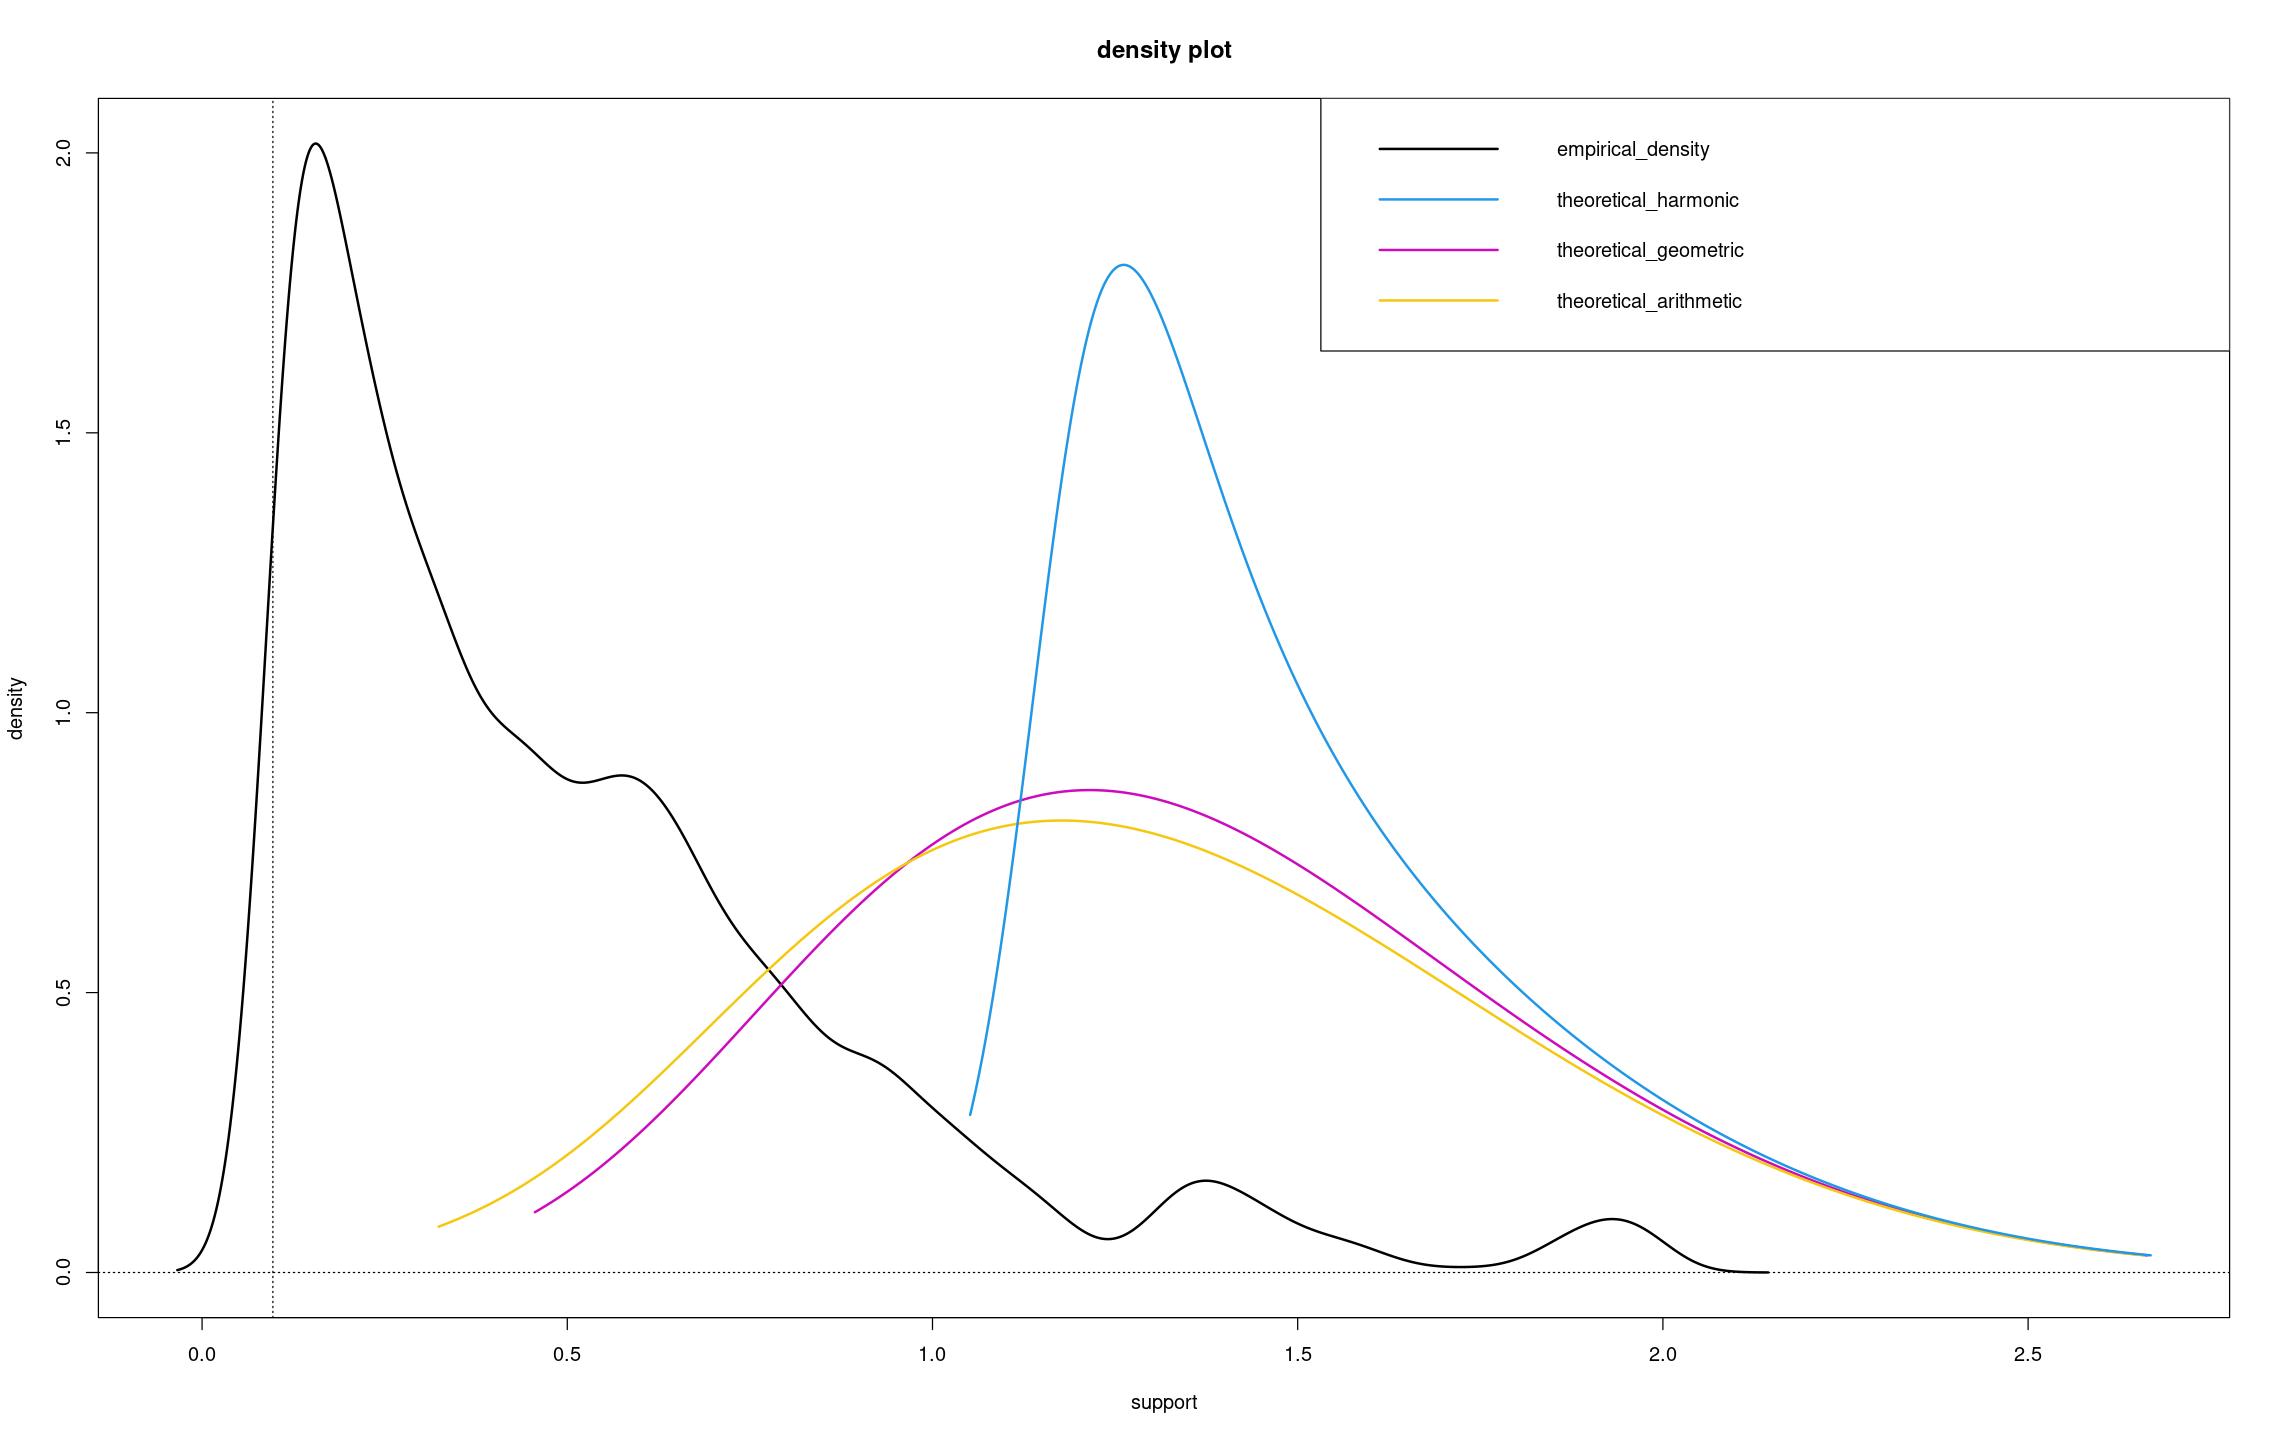

In [89]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

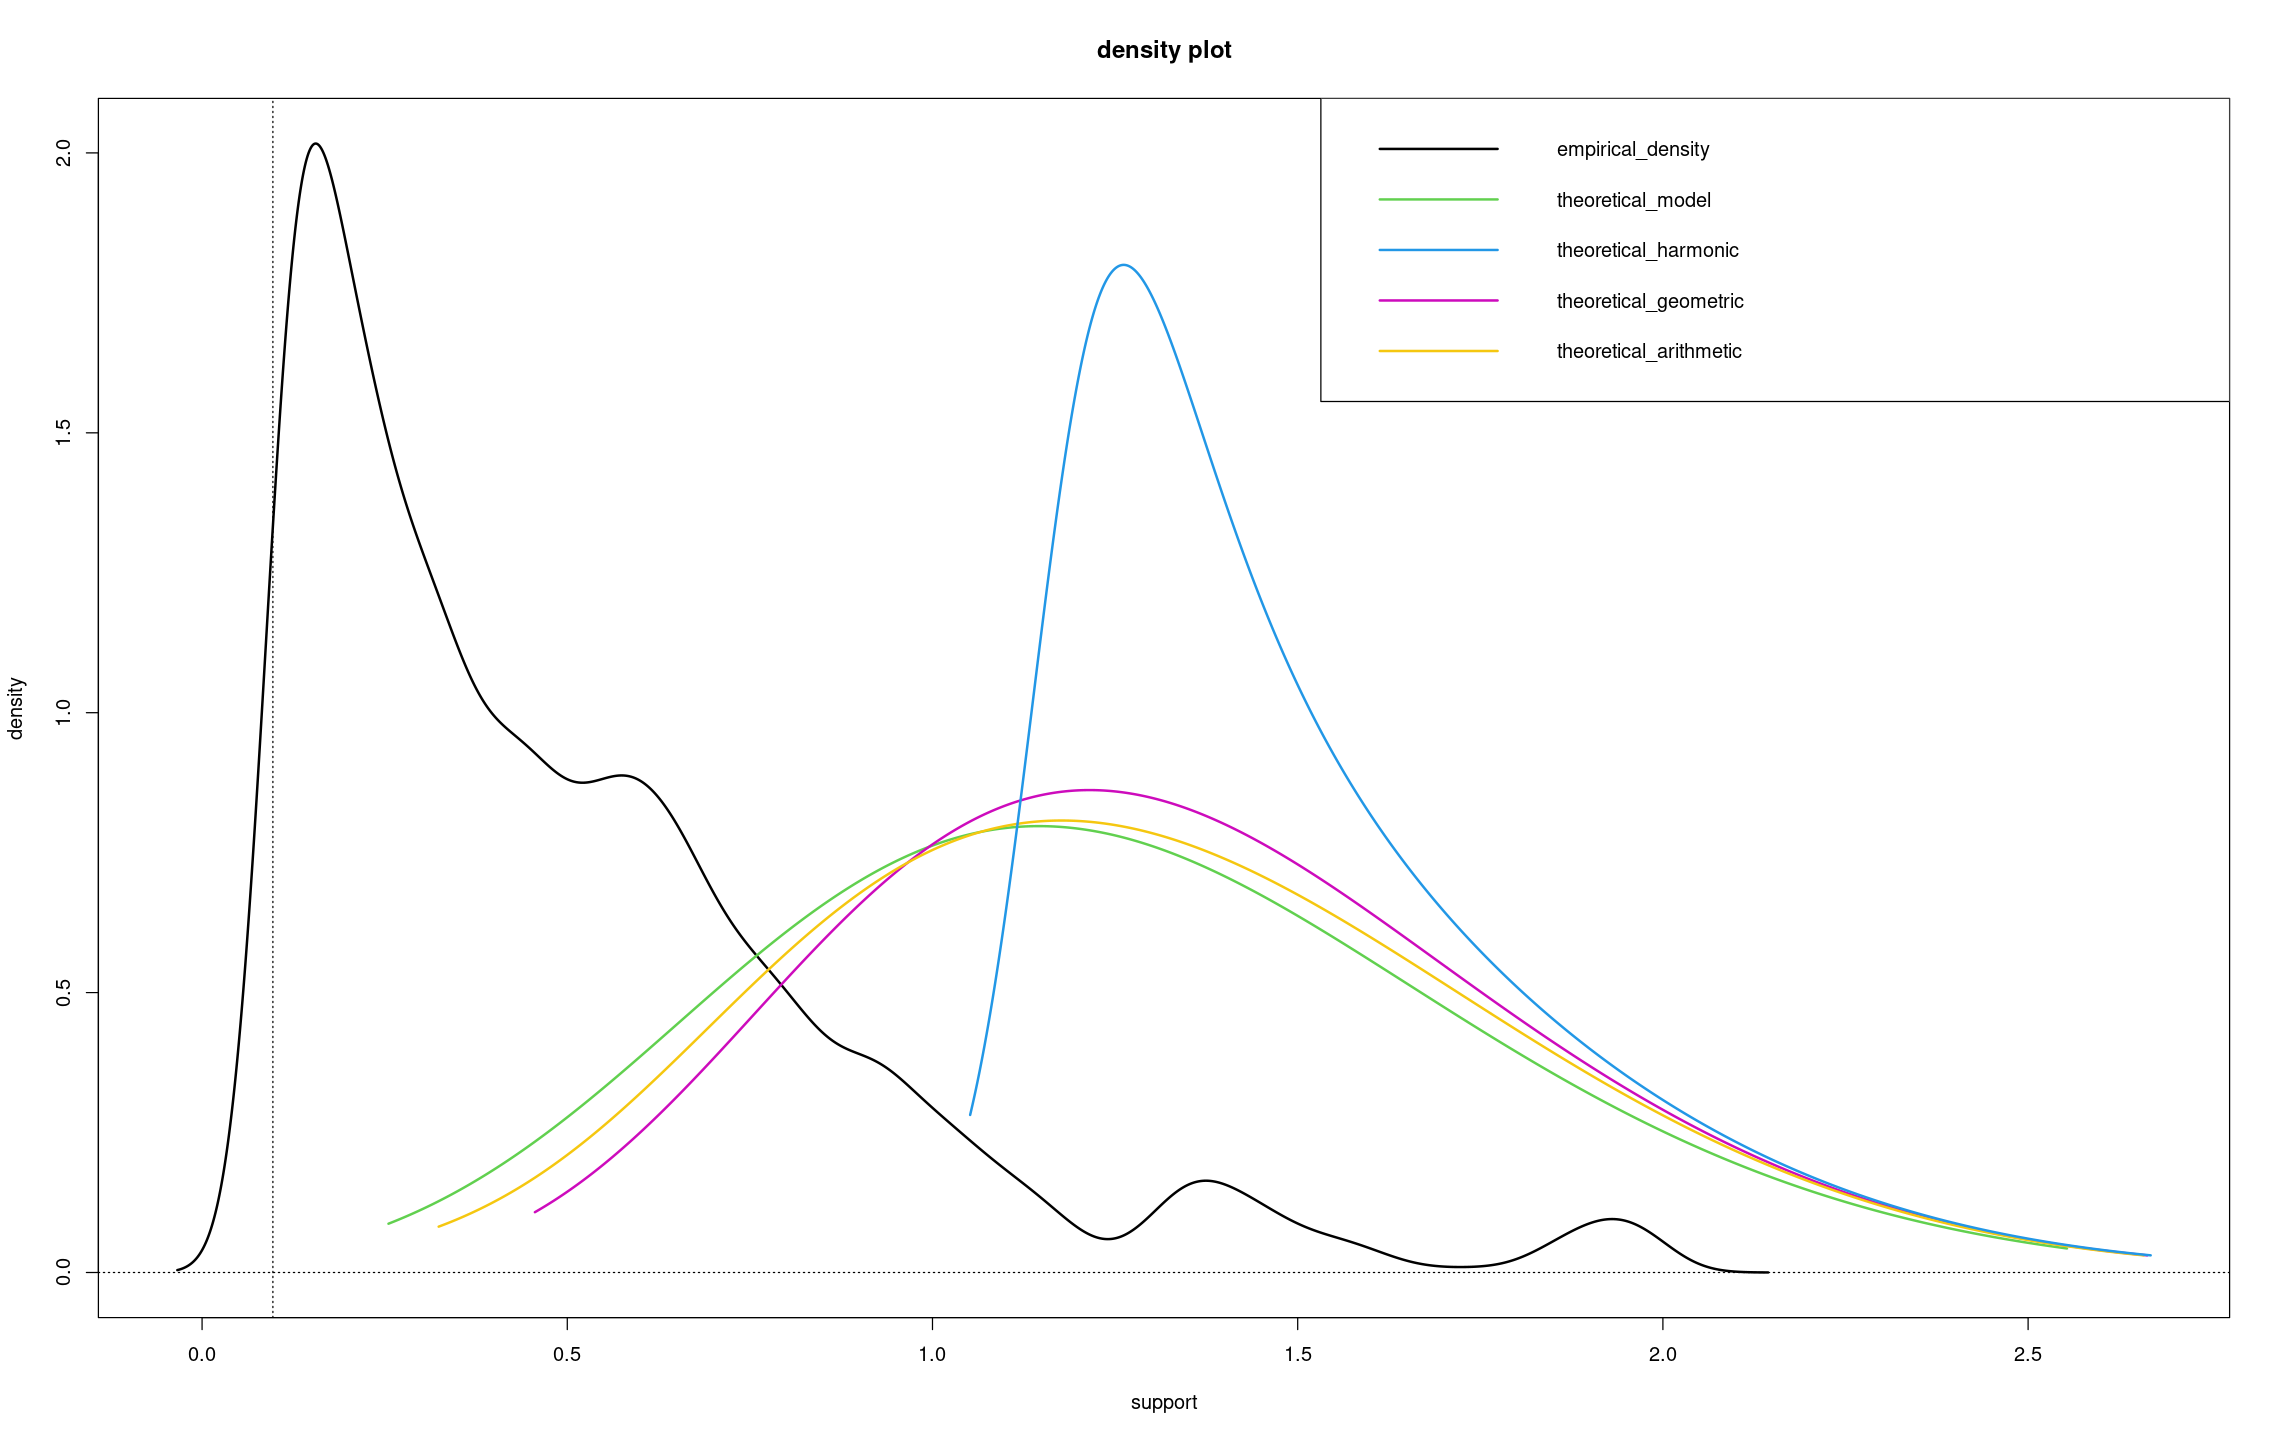

In [90]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

# Quantiles

## Quantile order: alpha = n^(-1)

In [91]:
n <- length(x)

alpha <- n^(-1)

print(alpha)

[1] 4.377133853e-05


## Quantiles vs covariates

In [92]:
partial_data_covariates <- ns_gev_mixture_model_object$partial_data_covariates

partial_data_covariates_variable <- partial_data_covariates |> select(all_of(selected_model_variable))

partial_data_covariates_variable

object
<dbl>
-1.211410243
-1.122007764
-0.585592890
-1.300812722
-0.764397848
-0.764397848
-0.853800327
-0.943202806
-0.853800327


In [93]:
range(partial_data_covariates_variable)

[1] -2.910057344  3.437518665

In [94]:
variable_values <- seq(from = min(partial_data_covariates_variable),
                       to = max(partial_data_covariates_variable),
                       length.out = 100)

new_covariates_values <- data.frame(variable_values)

names(new_covariates_values) <- selected_model_variable

new_covariates_values

object
<dbl>
-2.910057344
-2.845940415
-2.781823485
-2.717706556
-2.653589627
-2.589472697
-2.525355768
-2.461238838
-2.397121909


In [96]:
quantiles_new_covariates_values_list <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                                           alpha = alpha,
                                                                                           data = new_covariates_values,
                                                                                           do.ci = FALSE,
                                                                                           confidence_level = 0.95,
                                                                                           kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                                           iterations = 20)

quantiles_new_covariates_values <- sapply(quantiles_new_covariates_values_list, function(quantile){
  c("lower_bound" = quantile$smalest_lower_ci_bound, 
    "estimate" = quantile$gev_mixture_model_quantile, 
    "upper_bound" = quantile$largest_upper_ci_bound)
})

quantiles_new_covariates_values <- data.frame(t(quantiles_new_covariates_values))

quantiles_new_covariates_values

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
covariates_1,2.964804098,5.186668350,7.825224852
covariates_2,2.959300729,5.181274300,7.819773016
covariates_3,2.953797359,5.175880250,7.814321180
covariates_4,2.948293989,5.170488521,7.808869344
covariates_5,2.942790619,5.165099112,7.803417508
covariates_6,2.937287249,5.159707386,7.797965673
covariates_7,2.931783880,5.154317981,7.792513837
covariates_8,2.926280510,5.148930895,7.787062001
covariates_9,2.920777140,5.143541494,7.781610165


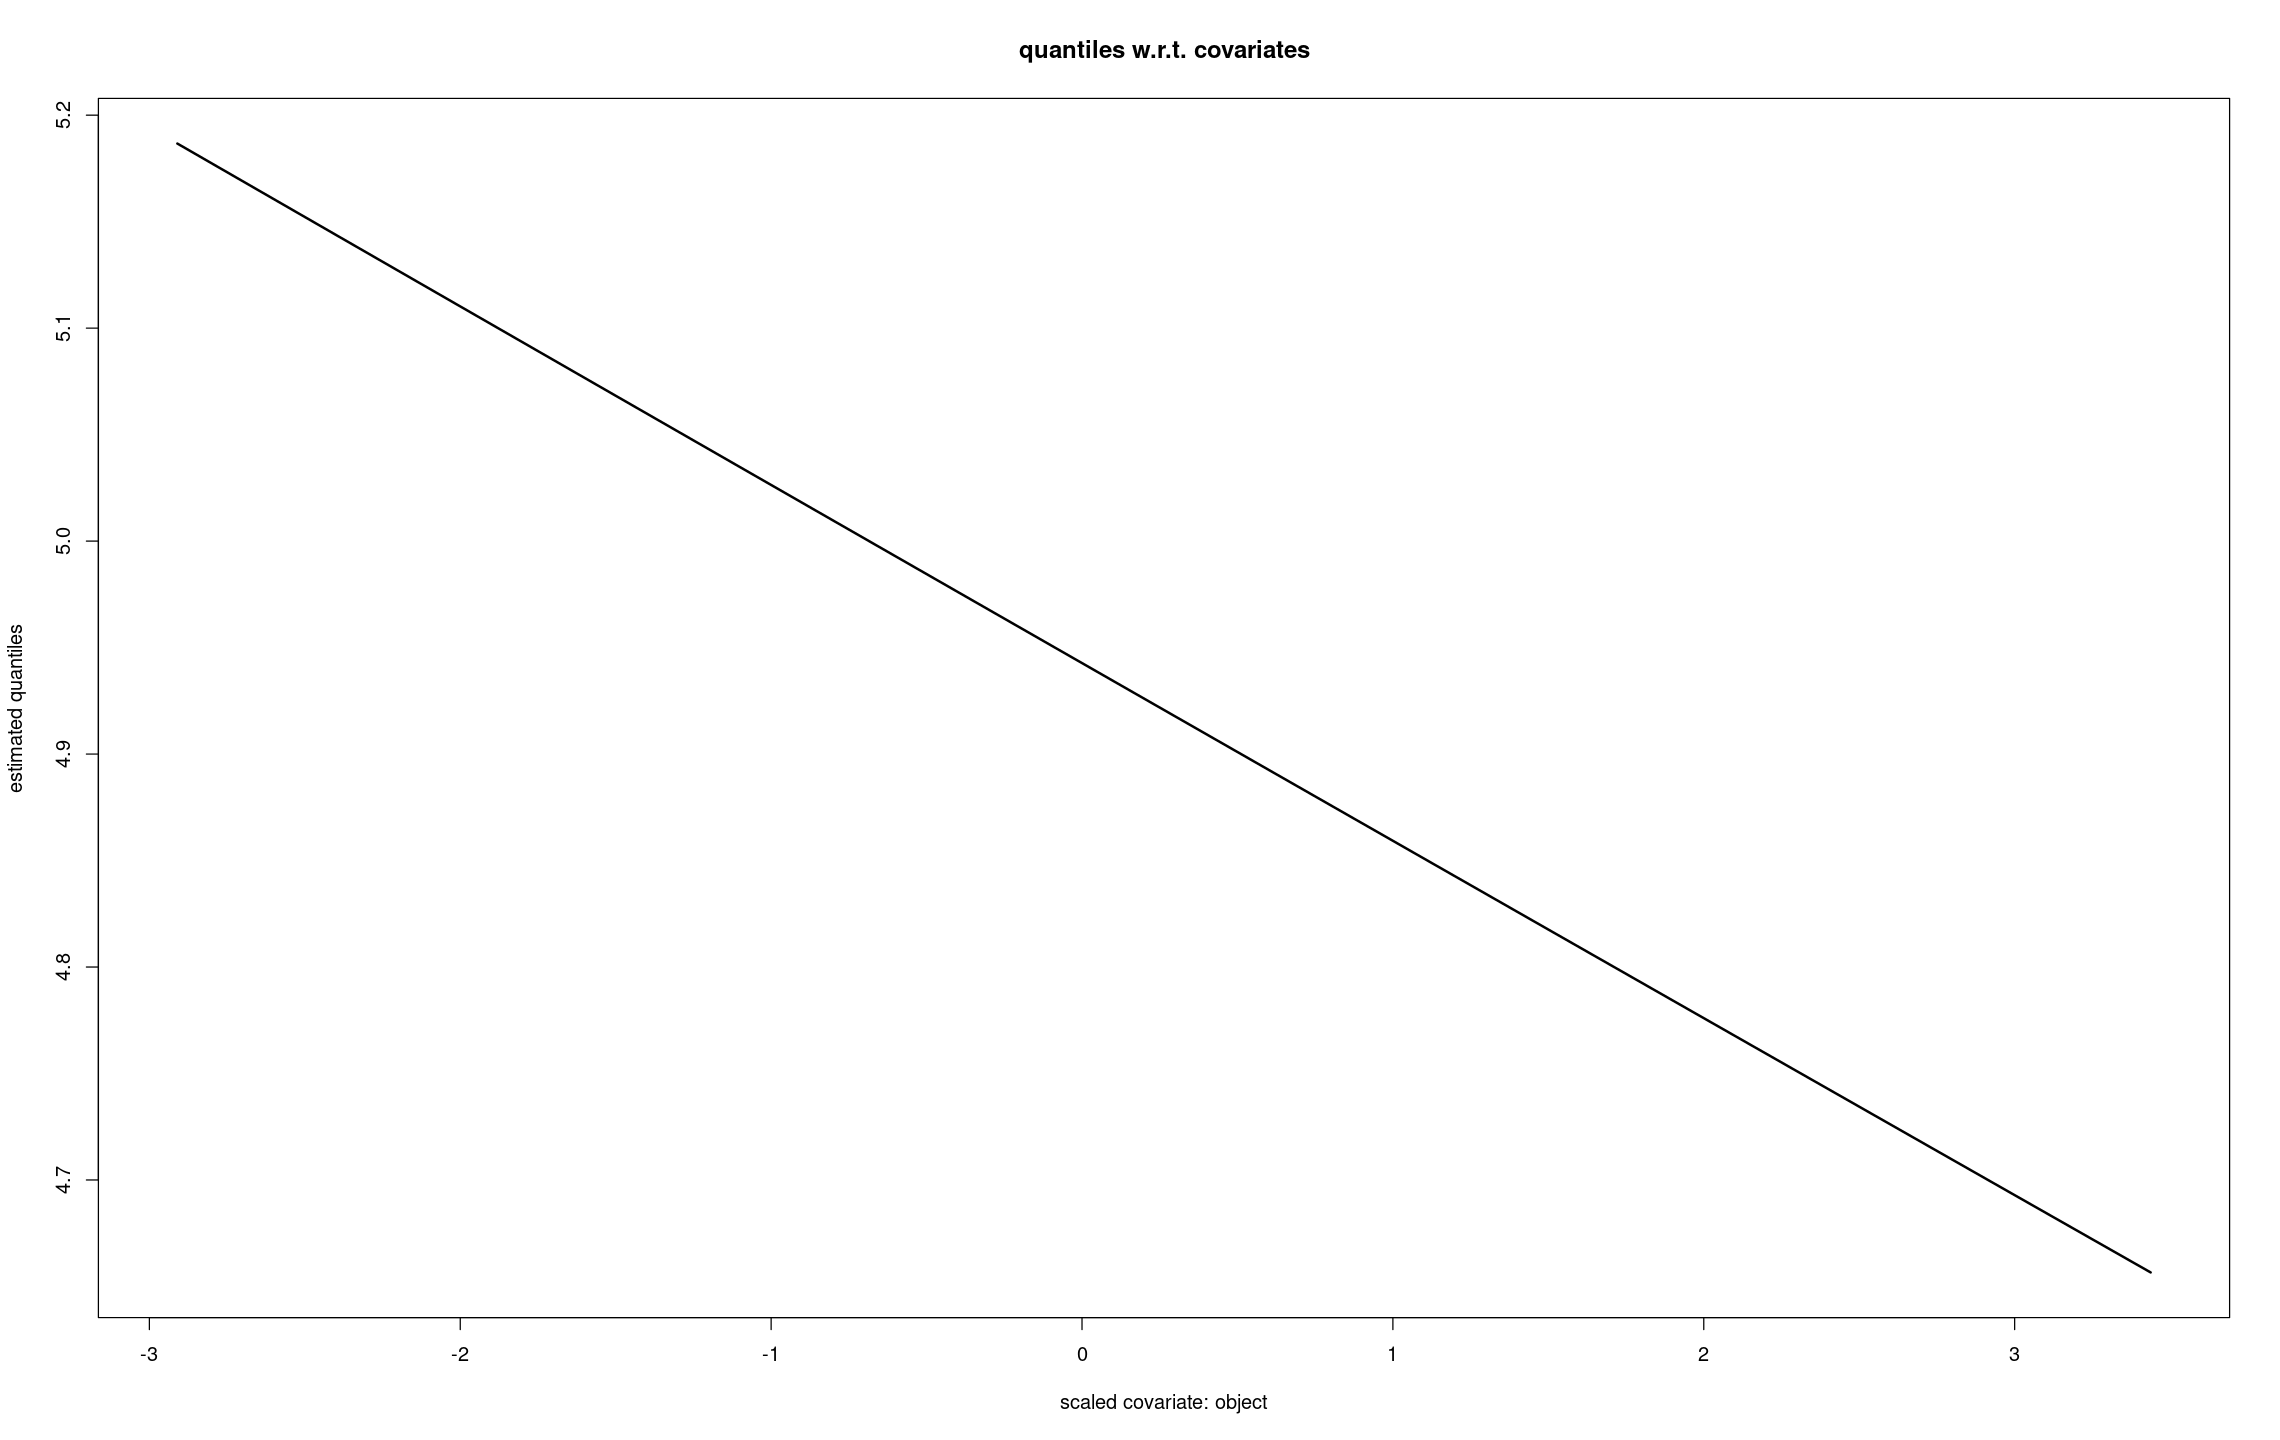

In [97]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x = new_covariates_values[, selected_model_variable], 
        y = quantiles_new_covariates_values$estimate,
        type = "l",
        lty = 1,
        lwd = 2,
        main = "quantiles w.r.t. covariates",
        xlab = paste("scaled covariate:", selected_model_variable),
        ylab = "estimated quantiles")


In [136]:
# options(repr.plot.width=19, repr.plot.height=12)
# 
# matplot(x = new_covariates_values[, selected_model_variable], 
#         y = quantiles_new_covariates_values,
#         type = "l",
#         lty = 1,
#         lwd = 2,
#         main = "quantiles w.r.t. covariates",
#         xlab = paste("scaled covariate:", selected_model_variable),
#         ylab = "estimated quantiles")
# 
# legend("topleft", legend = c("lower_bound", "estimate", "upper_bound"), col = 1:3, lty = 1, lwd = 2, horiz = FALSE, bty = "n")

## Custom quantile

In [99]:
true_quantile <- NULL

print(true_quantile)

NULL


In [100]:
custom_covariates_scaled <- data.frame("var" = 4)

names(custom_covariates_scaled) <- selected_model_variable

custom_covariates_scaled

object
<dbl>
4


In [101]:
several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models

predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
                                                                       data = custom_covariates_scaled,
                                                                       use_extremal_index = TRUE,
                                                                       normalize_parameters = TRUE)

do.call(rbind, predicted_parameters)

,location,scale,shape
,<dbl>,<dbl>,<dbl>
142,1.5964837853,0.4309653221,0.053959222115
171,1.4433045936,0.4142993904,0.023458363232
188,0.6797460026,0.4026871607,0.059804414696
199,0.6092411670,0.4057032125,0.055179882245
205,0.6716062282,0.3942576782,-0.052953558373
209,0.5584855919,0.3866007141,-0.034021451829
215,0.7213173751,0.4003497120,-0.007830431903
219,0.6096303266,0.3933844460,-0.046900776936
225,1.2155416290,0.3449557439,-0.093881878651


In [102]:
# index <- which.max(x)
# 
# new_data_covariates_scaled <- dplyr::slice(partial_data_covariates, index)
# 
# new_data_covariates_scaled |> select(all_of(selected_model_variable))

In [103]:
# several_ns_gev_models <- ns_gev_mixture_model_object$selected_full_ns_gev_models
# 
# predicted_parameters <- get_several_ns_gev_model_normalized_parameters(several_ns_gev_models = several_ns_gev_models,
#                                                                        data = new_data_covariates_scaled,
#                                                                        use_extremal_index = TRUE,
#                                                                        normalize_parameters = TRUE)
# 
# do.call(rbind, predicted_parameters)

In [104]:
results_geometric <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                        alpha = alpha,
                                                                        data = custom_covariates_scaled,
                                                                        do.ci = TRUE,
                                                                        confidence_level = 0.95,
                                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                        iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
142,2.5560254625,7.237665543,11.919305623
171,2.0036337912,6.061800094,10.119966397
188,0.3138278094,6.120544591,11.927261372
199,0.4508626878,5.955452547,11.460042407
205,1.3109283868,3.709984157,6.109039928
209,1.3016408786,3.808946686,6.316252493
215,0.9980908597,4.536334506,8.074578152
219,1.3028934952,3.725945034,6.148996573
225,1.8525705812,3.439837664,5.027104746


In [105]:
results_arithmetic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                         alpha = alpha,
                                                                         data = custom_covariates_scaled,
                                                                         do.ci = TRUE,
                                                                         confidence_level = 0.95,
                                                                         kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                         iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
142,2.5560254625,7.237665543,11.919305623
171,2.0036337912,6.061800094,10.119966397
188,0.3138278094,6.120544591,11.927261372
199,0.4508626878,5.955452547,11.460042407
205,1.3109283868,3.709984157,6.109039928
209,1.3016408786,3.808946686,6.316252493
215,0.9980908597,4.536334506,8.074578152
219,1.3028934952,3.725945034,6.148996573
225,1.8525705812,3.439837664,5.027104746


In [106]:
results_harmonic <- estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                                       alpha = alpha,
                                                                       data = custom_covariates_scaled,
                                                                       do.ci = TRUE,
                                                                       confidence_level = 0.95,
                                                                       kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                       iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
142,2.5560254625,7.237665543,11.919305623
171,2.0036337912,6.061800094,10.119966397
188,0.3138278094,6.120544591,11.927261372
199,0.4508626878,5.955452547,11.460042407
205,1.3109283868,3.709984157,6.109039928
209,1.3016408786,3.808946686,6.316252493
215,0.9980908597,4.536334506,8.074578152
219,1.3028934952,3.725945034,6.148996573
225,1.8525705812,3.439837664,5.027104746


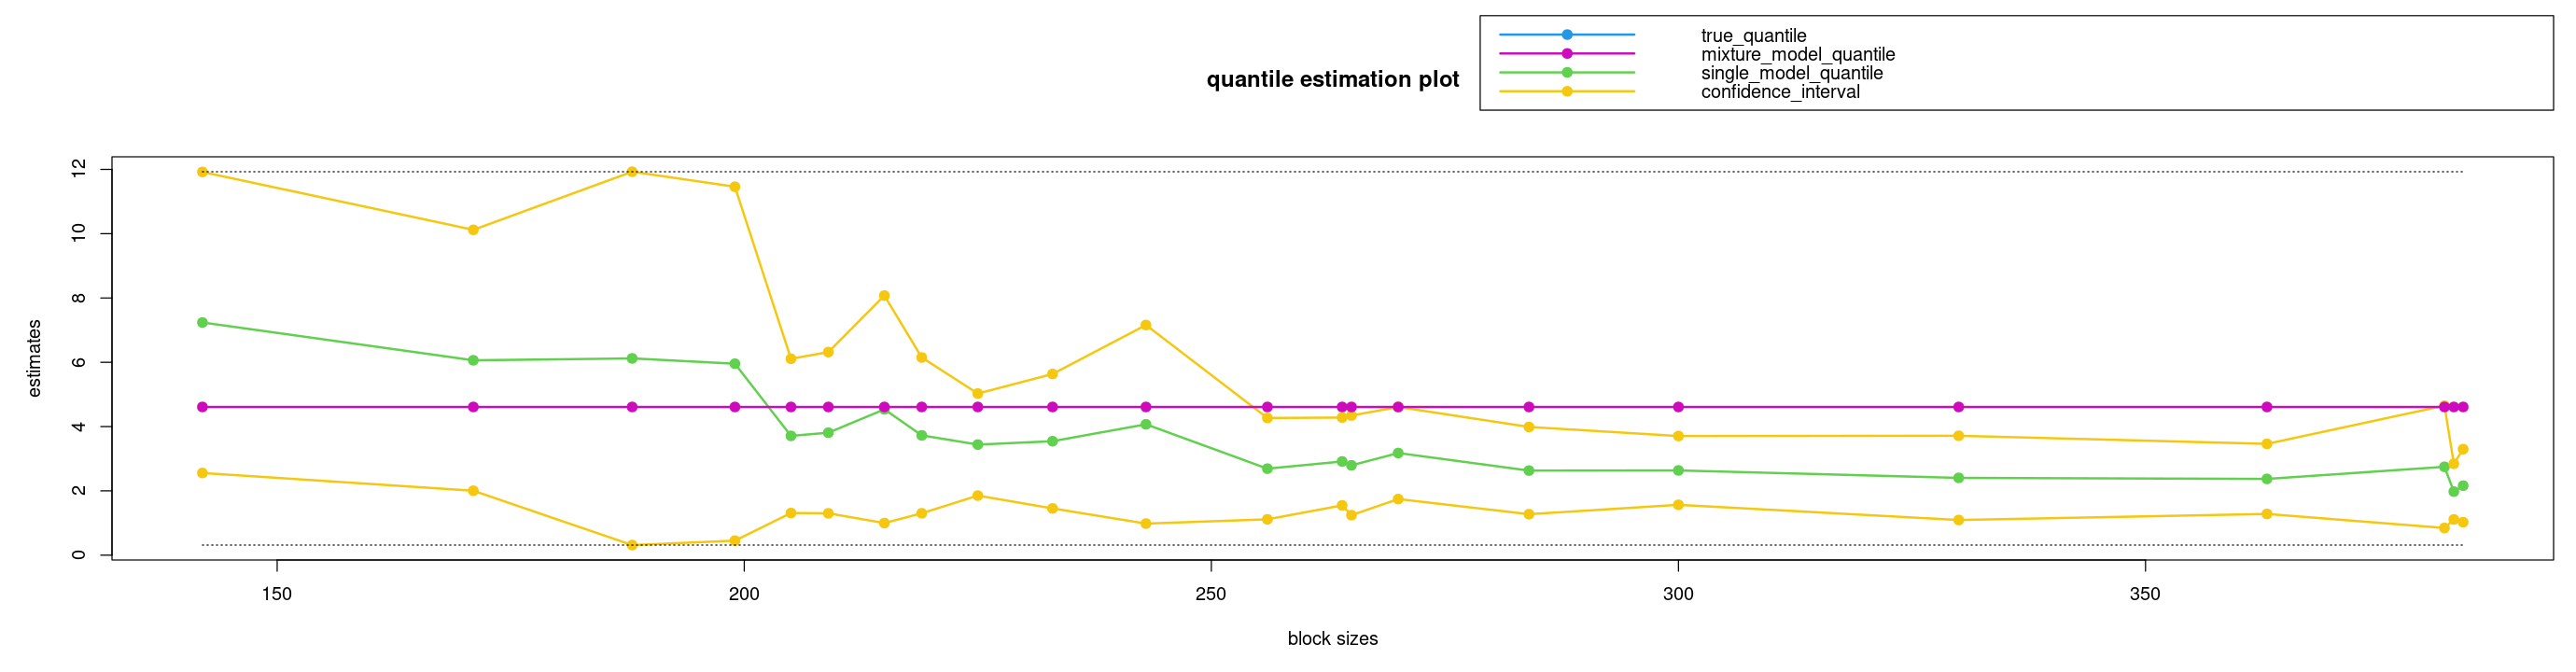

In [107]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_non_stationary_gev_mixture_model_quantile(ns_gev_mixture_model_object,
                                                        alpha = alpha,
                                                        data = custom_covariates_scaled,
                                                        data_index = 1,
                                                        true_quantile = NULL,
                                                        do.ci = TRUE,
                                                        confidence_level = 0.95,
                                                        kind = c("geometric", "arithmetic", "harmonic")[1],
                                                        iterations = 100,
                                                        xlab = "block sizes",
                                                        ylab = "estimates",
                                                        main = "quantile estimation plot",
                                                        legend_position = "topright")


# UDF GEV mixture model

## Formulation

In [116]:
# response variable
x <- data_object$response

In [109]:
# list of potential covariates
data_covariates <- data_object$predictors

names(data_covariates)

[1] "velocity"              "object"                "area"                 
 [4] "horizontal_left"       "horizontal_right"      "vertical_down"        
 [7] "vertical_up"           "name_airplane"         "name_bench"           
[10] "name_bench..group."    "name_bicycle"          "name_bird"            
[13] "name_bird..group."     "name_boat"             "name_bus"             
[16] "name_car"              "name_car..group."      "name_dog"             
[19] "name_electric.pole"    "name_fence"            "name_fire.hydrant"    
[22] "name_gas.station"      "name_helicopter"       "name_house"           
[25] "name_house..group."    "name_motorcycle"       "name_parking.meter"   
[28] "name_person"           "name_person..group."   "name_scooter"         
[31] "name_special.building" "name_stop.sign"        "name_street.light"    
[34] "name_tenement"         "name_traffic.light"    "name_traffic.sign"    
[37] "name_train"            "name_tree"             "name_tree..group."    
[40] "name_truck"            "name_tunnel"           "name_tunnel.entrance"

In [122]:
# model specification
custom_model <- list("location.fun" = ~object + velocity + name_tenement + name_tree, "scale.fun" = ~1, "shape.fun" = ~1)

custom_model

$location.fun
~object + velocity + name_tenement + name_tree

$scale.fun
~1

$shape.fun
~1


## Hyperparameters

In [123]:
use.phi <- TRUE
nlargest <- 20000
y <- extract_nlargest_sample(x, n = nlargest)
block_sizes <- NULL
minimum_nblocks <- 50
threshold <- min(y)
confidence_level <- 0.95
use_extremal_index <- TRUE
use_uniform_prior <- TRUE
method <- "MLE"

## Estimation

In [124]:
defaultW <- getOption("warn") 

options(warn = -1) 

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x,
                                                                    data = data_covariates,
                                                                    location.fun = as.formula(custom_model$location.fun),
                                                                    scale.fun = as.formula(custom_model$scale.fun),
                                                                    shape.fun = as.formula(custom_model$shape.fun),
                                                                    use.phi = use.phi,
                                                                    nlargest = nlargest,
                                                                    block_sizes = block_sizes,
                                                                    minimum_nblocks = minimum_nblocks,
                                                                    threshold = threshold,
                                                                    confidence_level = confidence_level,
                                                                    use_extremal_index = use_extremal_index,
                                                                    use_uniform_prior = use_uniform_prior,
                                                                    method = method)

options(warn = defaultW)

In [125]:
print(names(ns_gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "selected_ns_gev_coefficients"         
[16] "unnormalized_gev_parameters_object"   
[17] "normalized_gev_parameters_object"     
[18] "full_normalized_gev_parameters_object"
[19] "selected_model_per_obs"               
[20] "all_data_covariates"                  
[21] "partial_data_covariates"              
[22] "partial_data"                         
[23] "all_

In [126]:
ns_gev_mixture_model_object$selected_ns_gev_coefficients

,mu0,mu1,mu2,mu3,mu4,scale,shape
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
125,0.5498217215,-0.06495010090,0.11206784636,0.0222596780123,0.0063546724027,0.3146182353,0.119816542589
142,0.5794319523,-0.06857984961,0.09834981937,0.0436375688076,-0.0286229460209,0.3318475106,0.089141173680
171,0.6119841809,-0.08053933726,0.13027694782,0.0483674823228,-0.0378462300152,0.3499132445,0.052673222179
185,0.6291050025,-0.05757964672,0.13933366307,-0.0033925731369,-0.0009344572587,0.3706733951,-0.002654848272
188,0.6152114655,-0.06038653655,0.11710365037,0.0172607294911,0.0052882494290,0.3490389287,0.103269346283
193,0.6473761100,-0.02973177513,0.13492019629,-0.0271776323111,-0.0154821129743,0.3815647695,0.026959388838
199,0.6274716757,-0.05592750713,0.10397982014,-0.0089808338459,-0.0019268499014,0.3616253822,0.089278398442
202,0.6476297280,-0.06951062673,0.15913207225,0.0018401055536,0.0042132683073,0.3482320563,0.067523762946
205,0.6809970185,-0.04338143078,0.14289069026,0.0066081019028,-0.0478249147081,0.3878265255,-0.045484291405


In [127]:
data.frame("weights" = ns_gev_mixture_model_object$weights)

,weights
,<dbl>
125,1.000350123e-04
142,1.300455159e-03
171,2.450857800e-03
185,7.752713450e-03
188,3.971389986e-02
193,1.900665233e-03
199,5.752013205e-03
202,6.452258290e-03
205,1.065372881e-02


In [128]:
highest_weighted_model <- which.max(ns_gev_mixture_model_object$weights)

highest_weighted_model

366 
 69

In [129]:
model_quality <- round(ns_gev_mixture_model_object$information_criteria, 3)

model_quality

AIC       BIC 
 8902.935 14079.719

## Diagnostic

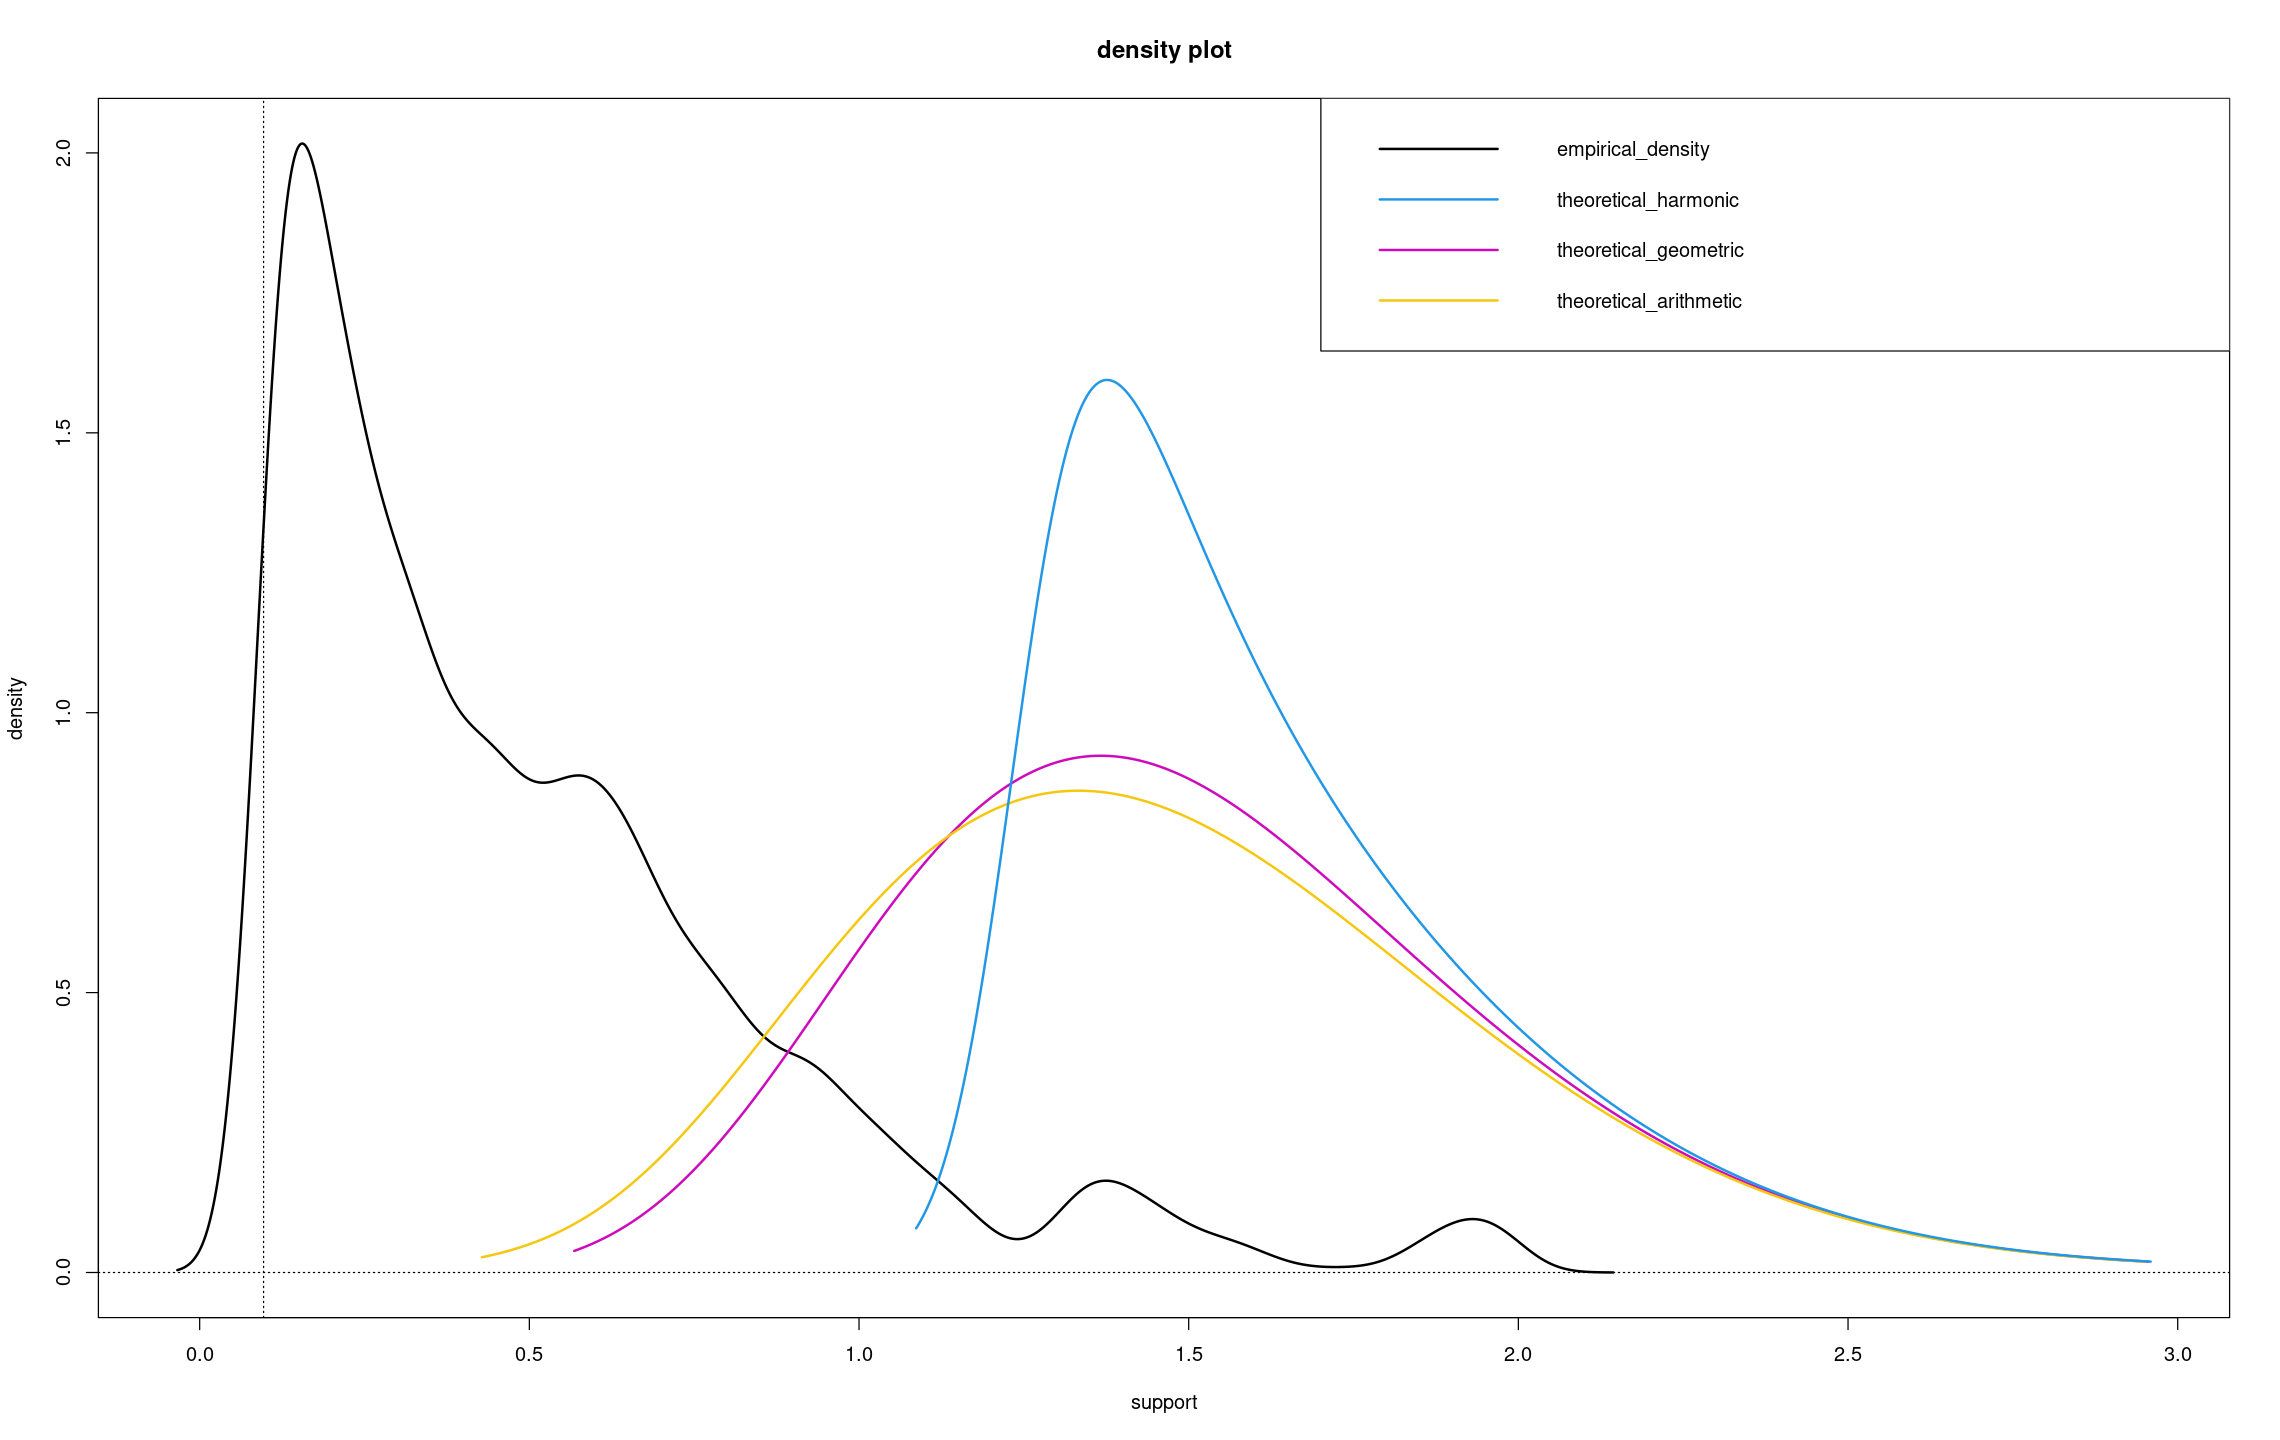

In [134]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = 0,
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

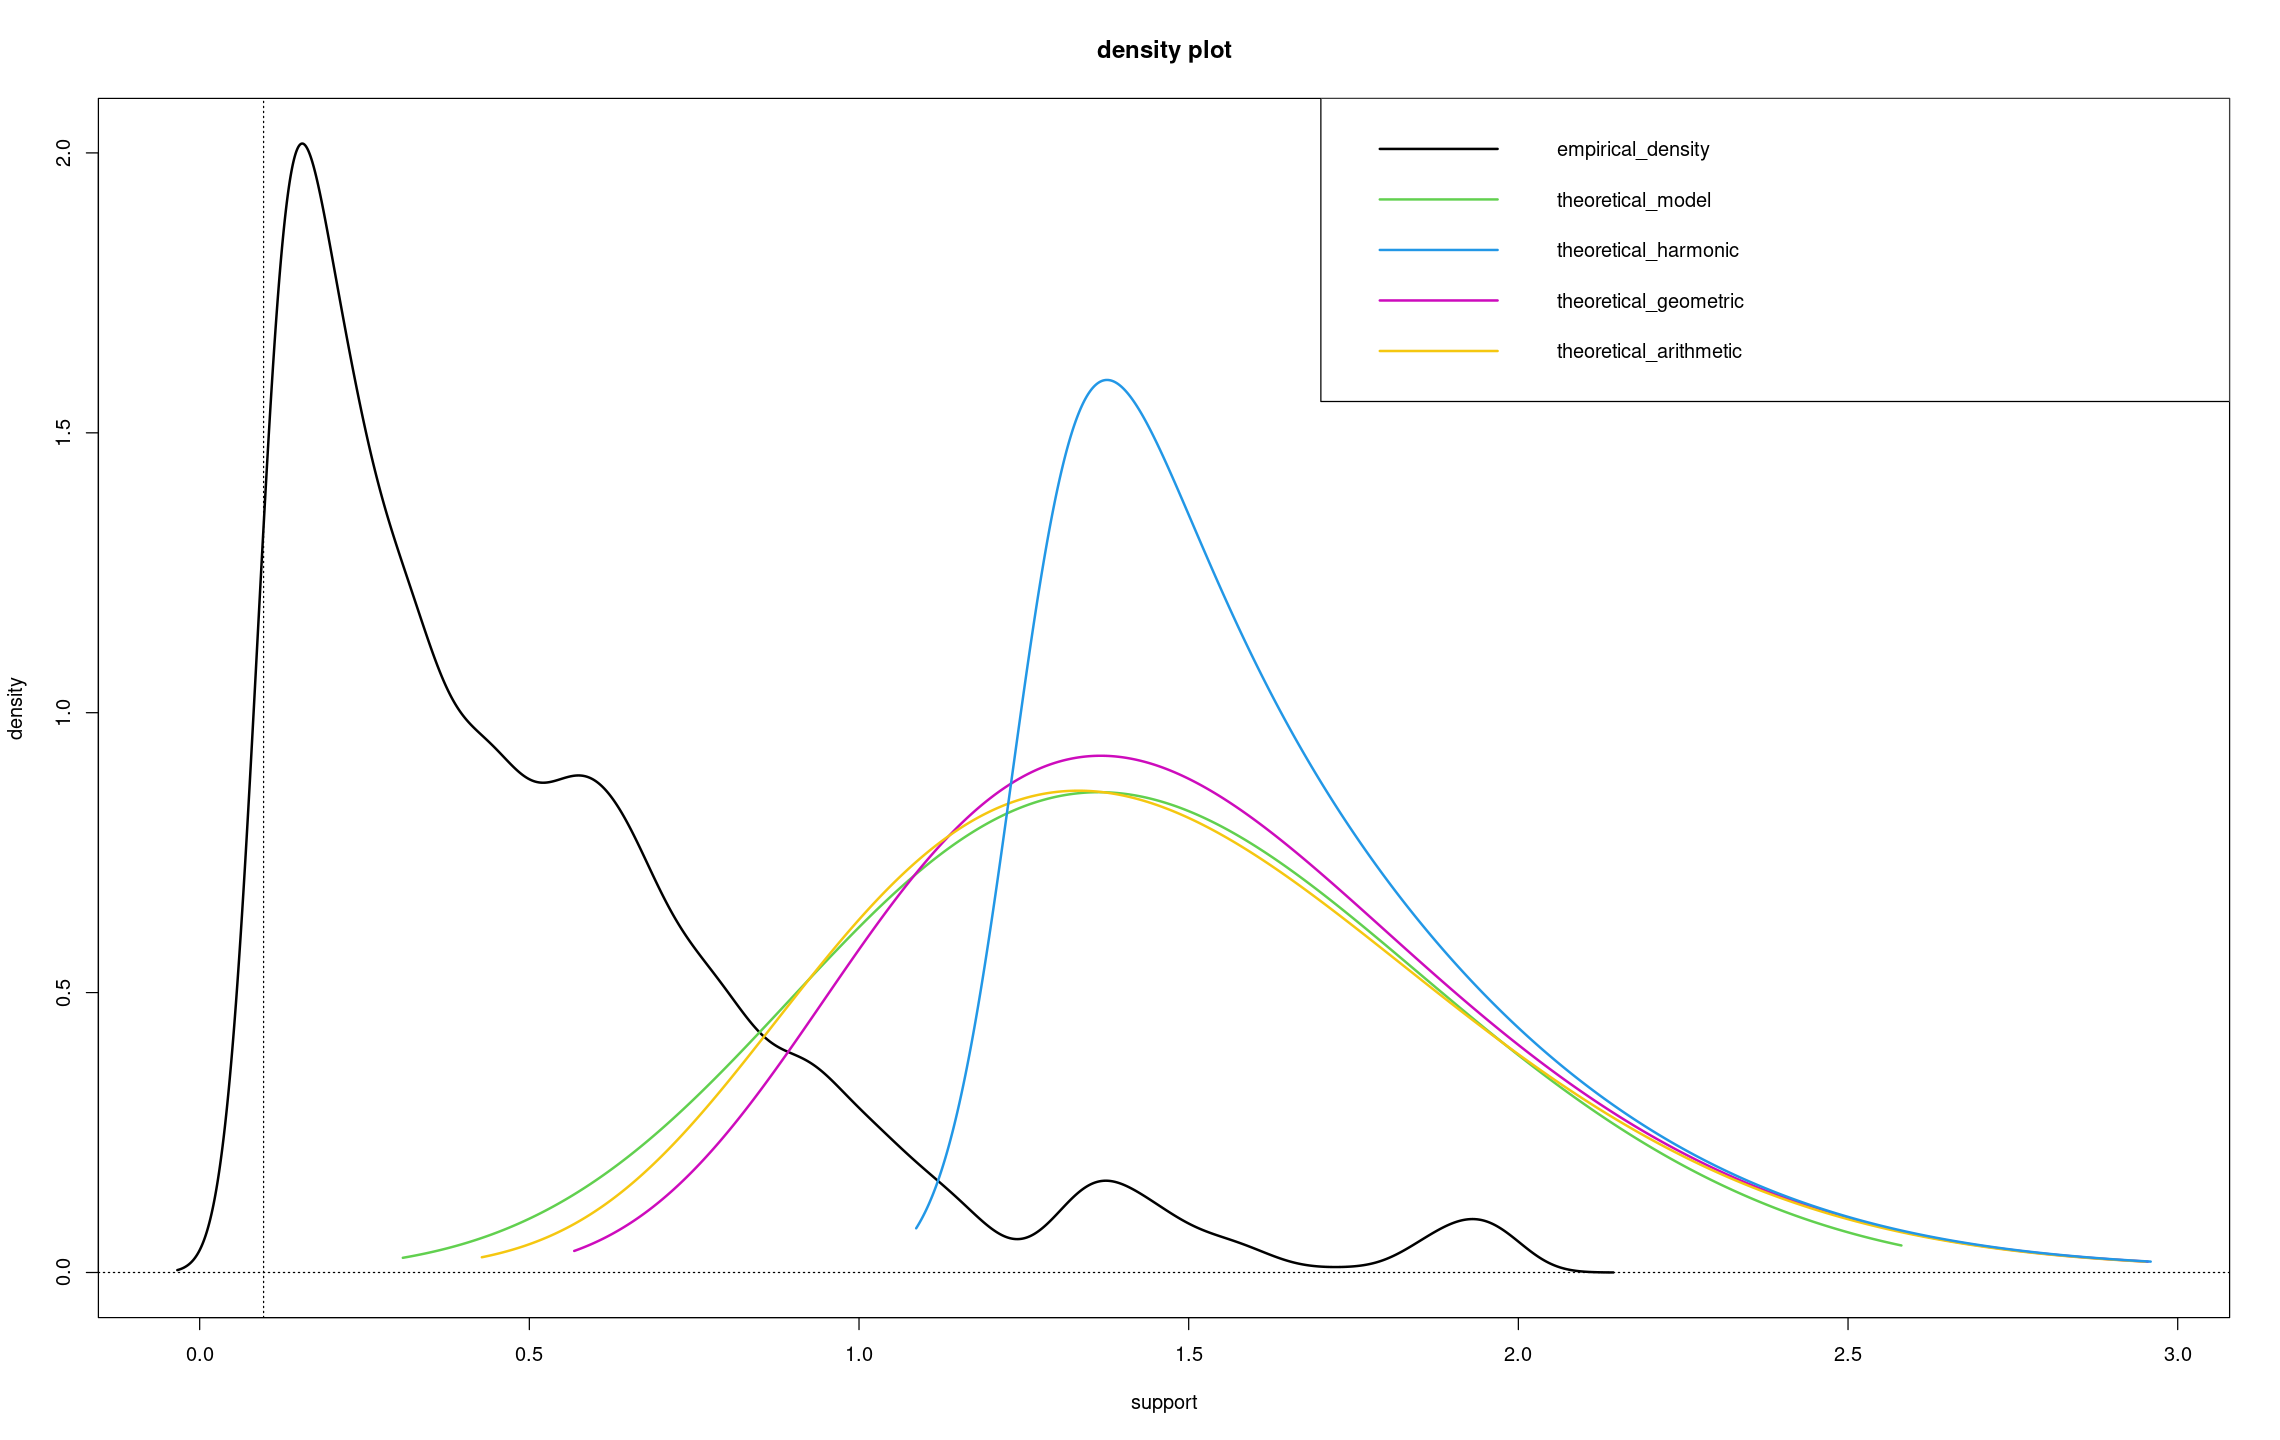

In [135]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_non_stationary_gev_mixture_model(ns_gev_mixture_model_object,
                                          data_index = 0,
                                          model_index = which.max(ns_gev_mixture_model_object$weights),
                                          zoom_thresholds = c(-Inf, +Inf),
                                          iterations = 10,
                                          xlab = "support",
                                          ylab = "density",
                                          main = "density plot",
                                          legend_position = "topright")

##  Prediction